In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
import warnings

warnings.filterwarnings('ignore') 

In [2]:
# Importing the dataset

df = pd.read_csv("Financial_data.csv")
pd.set_option('display.max_columns',113)
df

ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0       2009-06-11 16:40:39  2009-06-11 16:40:39                     0   
1       2009-06-10 15:48:57  2009-06-10 15:48:57                     0   
2       2009-06-05 19:12:29  2009-06-05 19:12:29                     0   
3       2009-06-13 12:01:20  2009-06-13 12:01:20                     0   
4       2009-06-10 10:17:13  2009-06-10 10:17:13                     0   
...                     ...                  ...                   ...   
134524  2015-01-02 16:31:36  2015-01-02 16:31:36                  2515   
134525  2015-01-05 16:14:26  2015-01-05 16:14:26                  1880   
134526  2015-01-02 14:04:27  2015-01-02 14:04:27                  1975   
134527  2015-01-05 16:56:12  2015-01-05 16:56:12                  1840   
134528  2015-01-06 11:07:06  2015-01-06 11:07:06                  2990   

        BidsApi  BidsManual   UserName  NewCreditCustomer  \
0             0    115.0410       KARU               True   
1             0    140.6057   koort681              False   
2             0    319.5580        0ie               True   
3             0     57.5205     Alyona               True   
4             0    319.5582        Kai               True   
...         ...         ...        ...                ...   
134524        0    485.0000  BO73K5A6A               True   
134525        0   1120.0000   BO311A49              False   
134526        0    525.0000  BO41K639A               True   
134527        0   1160.0000   BO45A925              False   
134528        0     10.0000  BO152923A              False   

       LoanApplicationStartedDate    LoanDate ContractEndDate  \
0             2009-06-11 16:40:39  2009-06-16      2010-07-06   
1             2009-06-10 15:48:57  2009-06-15      2009-07-07   
2             2009-06-05 19:12:29  2009-06-15             NaN   
3             2009-06-13 12:01:20  2009-06-15      2010-09-15   
4             2009-06-10 10:17:13  2009-06-14      2016-07-28   
...                           ...         ...             ...   
134524        2015-01-01 07:17:03  2015-01-06      2019-02-13   
134525        2015-01-05 07:56:22  2015-01-06      2019-02-07   
134526        2014-12-28 15:01:47  2015-01-06             NaN   
134527        2015-01-05 15:01:18  2015-01-06      2019-12-23   
134528        2015-01-05 20:50:24  2015-01-06             NaN   

       FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0            2009-07-27            2010-06-25        2010-06-25   
1            2009-07-15            2009-07-15        2009-07-15   
2            2009-07-27            2011-02-25        2014-05-13   
3            2009-07-15            2010-09-15        2010-09-15   
4            2009-07-27            2010-06-25        2010-06-25   
...                 ...                   ...               ...   
134524       2015-03-02            2020-02-03        2020-02-03   
134525       2015-03-05            2020-02-05        2019-02-20   
134526       2015-03-02            2020-02-03        2020-02-03   
134527       2015-03-02            2020-02-03

In [3]:
df.shape

(134529, 112)

In [4]:
for i in enumerate(df.columns):
    print(i)

(0, 'ReportAsOfEOD')
(1, 'LoanId')
(2, 'LoanNumber')
(3, 'ListedOnUTC')
(4, 'BiddingStartedOn')
(5, 'BidsPortfolioManager')
(6, 'BidsApi')
(7, 'BidsManual')
(8, 'UserName')
(9, 'NewCreditCustomer')
(10, 'LoanApplicationStartedDate')
(11, 'LoanDate')
(12, 'ContractEndDate')
(13, 'FirstPaymentDate')
(14, 'MaturityDate_Original')
(15, 'MaturityDate_Last')
(16, 'ApplicationSignedHour')
(17, 'ApplicationSignedWeekday')
(18, 'VerificationType')
(19, 'LanguageCode')
(20, 'Age')
(21, 'DateOfBirth')
(22, 'Gender')
(23, 'Country')
(24, 'AppliedAmount')
(25, 'Amount')
(26, 'Interest')
(27, 'LoanDuration')
(28, 'MonthlyPayment')
(29, 'County')
(30, 'City')
(31, 'UseOfLoan')
(32, 'Education')
(33, 'MaritalStatus')
(34, 'NrOfDependants')
(35, 'EmploymentStatus')
(36, 'EmploymentDurationCurrentEmployer')
(37, 'EmploymentPosition')
(38, 'WorkExperience')
(39, 'OccupationArea')
(40, 'HomeOwnershipType')
(41, 'IncomeFromPrincipalEmployer')
(42, 'IncomeFromPension')
(43, 'IncomeFromFamilyAllowance')
(44,

In [5]:
df['Status'].value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [6]:
df.info

<bound method DataFrame.info of        ReportAsOfEOD                                LoanId  LoanNumber  \
0         2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1         2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2         2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3         2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4         2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   
...              ...                                   ...         ...   
134524    2020-01-27  A9C9EF0F-4E79-4930-BA8A-A4130077FCC2      283484   
134525    2020-01-27  787345C2-7606-4F72-8FE2-A4170082D77C      285168   
134526    2020-01-27  E2D3384D-289A-4B4D-A2DA-A40F00F7C755      281602   
134527    2020-01-27  7CC7AB74-995B-4467-958A-A41700F78D59      285431   
134528    2020-01-27  3A0DEBF3-292C-4EB4-B71A-A4170157749D      285630   

                ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  \
0    

### CHECK FOR DUPLICATES

In [7]:
df.duplicated().sum()

0

### Handling Null Values

In [8]:
df.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [9]:
columns_with_nulls_over_53000 = df.columns[df.isnull().sum() > 53000].tolist()

# Remove 'DefaultDate' from the list if it exists
if 'DefaultDate' in columns_with_nulls_over_53000:
    columns_with_nulls_over_53000.remove('DefaultDate')

print(columns_with_nulls_over_53000)


['ContractEndDate', 'NrOfDependants', 'EmploymentPosition', 'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary', 'DebtOccuredOn', 'CurrentDebtDaysSecondary', 'DebtOccuredOnForSecondary', 'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1', 'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage', 'StageActiveSince', 'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2', 'ActiveLateCategory', 'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini', 'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs', 'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart', 'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn', 'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost', 'ActiveLateLastPaymentCategory']


In [10]:
 df.drop(columns_with_nulls_over_53000, axis = 1, inplace = True)

In [11]:
columns_with_nulls_under_53000 = df.columns[(df.isnull().sum() <= 53000) & (df.isnull().sum() > 0)].tolist()

# Remove 'DefaultDate' from the list if it exists
if 'DefaultDate' in columns_with_nulls_under_53000:
    columns_with_nulls_under_53000.remove('DefaultDate')

print(columns_with_nulls_under_53000)


['VerificationType', 'Gender', 'MonthlyPayment', 'County', 'City', 'Education', 'MaritalStatus', 'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 'OccupationArea', 'HomeOwnershipType', 'DebtToIncome', 'FreeCash', 'PlannedInterestTillDate', 'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 'ModelVersion', 'Rating', 'WorseLateCategory', 'CreditScoreEsMicroL', 'PreviousRepaymentsBeforeLoan', 'NextPaymentNr', 'NrOfScheduledPayments']


In [12]:
categorical_columns_with_NullValues = ['VerificationType','Gender','County','City','Education','MaritalStatus'
                                      ,'EmploymentStatus','EmploymentDurationCurrentEmployer','OccupationArea',
                                      'HomeOwnershipType','LastPaymentOn','ModelVersion','Rating','WorseLateCategory',
                                      'CreditScoreEsMicroL']

numerical_columns_with_NullValues = ['MonthlyPayment','DebtToIncome','FreeCash','PlannedInterestTillDate','ExpectedLoss','LossGivenDefault',
                                    'ExpectedReturn','ProbabilityOfDefault','PrincipalOverdueBySchedule','PreviousRepaymentsBeforeLoan',
                                    'NextPaymentNr','NrOfScheduledPayments']

In [13]:
for i in numerical_columns_with_NullValues:
    df[i]=df[i].fillna(round(df[i].mean(),2))

In [14]:
for i in categorical_columns_with_NullValues:
    df[i] = df[i].fillna(df[i].mode()[0])

In [15]:
all(df.isnull().sum() == 0)

False

### CHECK DATA TYPES

In [16]:
df.dtypes

ReportAsOfEOD                              object
LoanId                                     object
LoanNumber                                  int64
ListedOnUTC                                object
BiddingStartedOn                           object
                                           ...   
AmountOfPreviousLoansBeforeLoan           float64
PreviousRepaymentsBeforeLoan              float64
PreviousEarlyRepaymentsCountBeforeLoan      int64
NextPaymentNr                             float64
NrOfScheduledPayments                     float64
Length: 76, dtype: object

In [17]:
df_datatypes = pd.DataFrame(df.dtypes)
pd.set_option('display.max_rows',76)
df_datatypes

0
ReportAsOfEOD                            object
LoanId                                   object
LoanNumber                                int64
ListedOnUTC                              object
BiddingStartedOn                         object
BidsPortfolioManager                      int64
BidsApi                                   int64
BidsManual                              float64
UserName                                 object
NewCreditCustomer                          bool
LoanApplicationStartedDate               object
LoanDate                                 object
FirstPaymentDate                         object
MaturityDate_Original                    object
MaturityDate_Last                        object
ApplicationSignedHour                     int64
ApplicationSignedWeekday                  int64
VerificationType                        float64
LanguageCode                              int64
Age                                       int64
DateOfBirth                              object
Gender                                  float64
Country                                  object
AppliedAmount                           float64
Amount                                  float64
Interest                                float64
LoanDuration                              int64
MonthlyPayment                          float64
County                                   object
City                                     object
UseOfLoan                                 int64
Education                               float64
MaritalStatus                           float64
EmploymentStatus                        float64
EmploymentDurationCurrentEmployer        object
OccupationArea                          float64
HomeOwnershipType                       float64
IncomeFromPrincipalEmployer             float64
IncomeFromPension                       float64
IncomeFromFamilyAllowance               float64
IncomeFromSocialWelfare                 float64
IncomeFromLeavePay                      float64
IncomeFromChildSupport                  float64
IncomeOther                             float64
IncomeTotal                             float64
ExistingLiabilities                       int64
LiabilitiesTotal                        float64
RefinanceLiabilities                      int64
DebtToIncome                            float64
FreeCash                                float64
MonthlyPaymentDay                         int64
ActiveScheduleFirstPaymentReached          bool
PlannedInterestTillDate                 float64
LastPaymentOn                            object
ExpectedLoss                            float64
LossGivenDefault                        float64
ExpectedReturn                          float64
ProbabilityOfDefault                    float64
DefaultDate                              object
PrincipalOverdueBySchedule              float64
ModelVersion                            float64
Rating                                   object
Status                                   object
Restructured                               bool
WorseLateCategory                        object
CreditScoreEsMicroL                      object
PrincipalPaymentsMade                   float64
InterestAndPenaltyPaymentsMade          float64
PrincipalBalance                        float64
InterestAndPenaltyBalance               float64
NoOfPreviousLoansBeforeLoan               int64
AmountOfPreviousLoansBeforeLoan         float64
PreviousRepaymentsBeforeLoan            float64
PreviousEarlyRepaymentsCountBeforeLoan    int64
NextPaymentNr                           float64
NrOfScheduledPayments                   float64

In [18]:
df.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0  2009-06-16       2009-07-27            2010-06-25        2010-06-25   
1  2009-06-15       2009-07-15            2009-07-15        2009-07-15   
2  2009-06-15       2009-07-27            2011-02-25        2014-05-13   
3  2009-06-15       2009-07-15            2010-09-15        2010-09-15   
4  2009-06-14       2009-07-27            2010-06-25        2010-06-25   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                     17                         5               2.0   
1                     20                         4               2.0   
2                     20                         6               2.0   
3                     12                         7               2.0   
4                     10                         4               2.0   

   LanguageCode  Age DateOfBirth  Gender Country  AppliedAmount    Amount  \
0             1   61  1947-11-26     1.0      EE       319.5582  115.0408   
1             1   48  1960-11-05     1.0      EE       191.7349  140.6057   
2             1   58  1950-11-13     1.0      EE       319.5582  319.5409   
3             1   23  1986-03-29     1.0      EE       127.8233   57.5205   
4             1   25  1983-09-30     1.0      EE       319.5582  319.5436   

   Interest  LoanDuration  MonthlyPayment    County          City  UseOfLoan  \
0      30.0            12          119.08     HARJU       TALLINN          7   
1      25.0             1          119.08  IDA-VIRU  KOHTLA-JARVE          7   
2      25.0            20          119.08     PÄRNU         PÄRNU          2   
3      45.0            15          119.08     HARJU      PALDISKI          0   
4      30.0            12          119.08     TARTU         TARTU          6   

   Education  MaritalStatus  EmploymentStatus  \
0        3.0            1.0               3.0   
1        5.0            4.0               3.0   
2        4.0            1.0               3.0   
3        2.0            3.0              -1.0   
4        4.0            2.0               3.0   

  EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                        UpTo3Years             7.0                1.0   
1                    MoreThan5Years            16.0                1.0   
2                        UpTo4Years             9.0                1.0   
3                        UpTo2Years             1.0                1.0   
4                        UpTo2Years             7.0                1.0   

   IncomeFromPrincipalEmployer  IncomeFromPension  IncomeFromFamilyAllowance  \
0                       6000.0       

### FINDING TARGET VARIABLE

In [19]:
col = ['WorseLateCategory','Status']

In [20]:
df[col]

WorseLateCategory  Status
0                 91-120  Repaid
1                   180+  Repaid
2                   180+    Late
3                  31-60  Repaid
4                   180+  Repaid
...                  ...     ...
134524              180+  Repaid
134525             31-60  Repaid
134526              180+    Late
134527              180+  Repaid
134528              180+    Late

[134529 rows x 2 columns]

* WorseLateCategory	: Displays the last longest period of days when the loan was in Principal Debt
* Status : The current status of the loan application
* ActiveLateCategory : When a loan is in Principal Debt then it will be categorized by Principal Debt days* 
ActiveLateLastPaymentCategor : 	Shows how many days has passed since last payment and categorised if it is overdu
* DefaultDate :	The date when loan went into defaulted state and collection process was started e

In [21]:
df['DefaultDate'] = df['DefaultDate'].fillna('Nil')
df['Default_status'] = np.where(df['DefaultDate']=='Nil',0,1)

In [22]:
df[['DefaultDate','Default_status']]

DefaultDate  Default_status
0              Nil               0
1              Nil               0
2       2012-07-16               1
3              Nil               0
4       2009-09-28               1
...            ...             ...
134524  2015-05-04               1
134525         Nil               0
134526  2015-08-04               1
134527  2016-06-17               1
134528  2015-12-30               1

[134529 rows x 2 columns]

In [23]:
df['Default_status'].value_counts()

0    91614
1    42915
Name: Default_status, dtype: int64

* Default_status = 1  (Default)
* Default_status = 0  (Not Default)

In [24]:
df.head()

ReportAsOfEOD                                LoanId  LoanNumber  \
0    2020-01-27  F0660C80-83F3-4A97-8DA0-9C250112D6EC         659   
1    2020-01-27  978BB85B-1C69-4D51-8447-9C240104A3A2         654   
2    2020-01-27  EA44027E-7FA7-4BB2-846D-9C1F013C8A22         641   
3    2020-01-27  CE67AD25-2951-4BEE-96BD-9C2700C61EF4         668   
4    2020-01-27  9408BF8C-B159-4D6A-9D61-9C2400A986E3         652   

           ListedOnUTC     BiddingStartedOn  BidsPortfolioManager  BidsApi  \
0  2009-06-11 16:40:39  2009-06-11 16:40:39                     0        0   
1  2009-06-10 15:48:57  2009-06-10 15:48:57                     0        0   
2  2009-06-05 19:12:29  2009-06-05 19:12:29                     0        0   
3  2009-06-13 12:01:20  2009-06-13 12:01:20                     0        0   
4  2009-06-10 10:17:13  2009-06-10 10:17:13                     0        0   

   BidsManual  UserName  NewCreditCustomer LoanApplicationStartedDate  \
0    115.0410      KARU               True        2009-06-11 16:40:39   
1    140.6057  koort681              False        2009-06-10 15:48:57   
2    319.5580       0ie               True        2009-06-05 19:12:29   
3     57.5205    Alyona               True        2009-06-13 12:01:20   
4    319.5582       Kai               True        2009-06-10 10:17:13   

     LoanDate FirstPaymentDate MaturityDate_Original MaturityDate_Last  \
0  2009-06-16       2009-07-27            2010-06-25        2010-06-25   
1  2009-06-15       2009-07-15            2009-07-15        2009-07-15   
2  2009-06-15       2009-07-27            2011-02-25        2014-05-13   
3  2009-06-15       2009-07-15            2010-09-15        2010-09-15   
4  2009-06-14       2009-07-27            2010-06-25        2010-06-25   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                     17                         5               2.0   
1                     20                         4               2.0   
2                     20                         6               2.0   
3                     12                         7               2.0   
4                     10                         4               2.0   

   LanguageCode  Age DateOfBirth  Gender Country  AppliedAmount    Amount  \
0             1   61  1947-11-26     1.0      EE       319.5582  115.0408   
1             1   48  1960-11-05     1.0      EE       191.7349  140.6057   
2             1   58  1950-11-13     1.0      EE       319.5582  319.5409   
3             1   23  1986-03-29     1.0      EE       127.8233   57.5205   
4             1   25  1983-09-30     1.0      EE       319.5582  319.5436   

   Interest  LoanDuration  MonthlyPayment    County          City  UseOfLoan  \
0      30.0            12          119.08     HARJU       TALLINN          7   
1      25.0             1          119.08  IDA-VIRU  KOHTLA-JARVE          7   
2      25.0            20          119.08     PÄRNU         PÄRNU          2   
3      45.0            15          119.08     HARJU      PALDISKI          0   
4      30.0            12          119.08     TARTU         TARTU          6   

   Education  MaritalStatus  EmploymentStatus  \
0        3.0            1.0               3.0   
1        5.0            4.0               3.0   
2        4.0            1.0               3.0   
3        2.0            3.0              -1.0   
4        4.0            2.0               3.0   

  EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                        UpTo3Years             7.0                1.0   
1                    MoreThan5Years            16.0                1.0   
2                        UpTo4Years             9.0                1.0   
3                        UpTo2Years             1.0                1.0   
4                        UpTo2Years             7.0                1.0   

   IncomeFromPrincipalEmployer  IncomeFromPension  IncomeFromFamilyAllowance  \
0                       6000.0       

In [25]:
df.columns

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome'

#### DROPPING COLUMNS

In [26]:
cols_to_drop=['LoanId','LoanNumber','UserName']

In [27]:
df.drop(cols_to_drop, axis = 1, inplace = True)

In [28]:
df.drop('DateOfBirth', axis = 1, inplace = True)


In [29]:
df.drop('City', axis = 1, inplace = True)
df.drop('County', axis = 1, inplace = True)

In [30]:
df = df.replace(-1, 1)


In [31]:
drop_indices = df[df['LanguageCode'].isin([22, 5, 15,10,13,7,21])].index #(DO NOT DROP)
df.drop(drop_indices, inplace=True)

# Display the updated DataFrame
print("Updated DataFrame after dropping rows:")
print(df)

Updated DataFrame after dropping rows:
       ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0         2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1         2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2         2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3         2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4         2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   
...              ...                  ...                  ...   
134524    2020-01-27  2015-01-02 16:31:36  2015-01-02 16:31:36   
134525    2020-01-27  2015-01-05 16:14:26  2015-01-05 16:14:26   
134526    2020-01-27  2015-01-02 14:04:27  2015-01-02 14:04:27   
134527    2020-01-27  2015-01-05 16:56:12  2015-01-05 16:56:12   
134528    2020-01-27  2015-01-06 11:07:06  2015-01-06 11:07:06   

        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410               True   
1                       

In [32]:
drop_indices = df[df['Education'].isin([0])].index
df.drop(drop_indices, inplace=True)
drop_indices = df[df['MaritalStatus'].isin([0])].index
df.drop(drop_indices, inplace=True)
drop_indices = df[df['EmploymentStatus'].isin([0])].index
df.drop(drop_indices, inplace=True)


#### Correcting the datatypes

In [33]:
columns_int = ['VerificationType','Gender','Education','MaritalStatus','EmploymentStatus','OccupationArea','HomeOwnershipType','ModelVersion']
df[columns_int] = df[columns_int].astype(int)

#### Correcting values

In [34]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace(-1.0, 1.0)
df['MaritalStatus'] = df['MaritalStatus'].replace(-1.0, 1.0)
df['UseOfLoan'] = df['UseOfLoan'].replace(-1, 1)

In [35]:
# from sklearn.preprocessing import LabelEncoder

# colums_binary=[]
# for i in df:
#     if df[i].nunique()==2:
#         colums_binary.append(i)
# colums_binary

In [36]:
# lb=LabelEncoder()
# for i in colums_binary:
#     df[i] = lb.fit_transform(df[i])

In [37]:
# df[colums_binary]

In [38]:
df['CreditScoreEsMicroL'].value_counts()

M      121975
M1       4321
M5       2428
M2       1723
M3       1643
M4       1535
M6        560
M8        102
M9         70
M7         69
M10        55
Name: CreditScoreEsMicroL, dtype: int64

In [39]:
# from sklearn.preprocessing import LabelEncoder

# # Define columns to encode
# columns_to_encode = ['Country', 'EmploymentDurationCurrentEmployer', 'Rating', 'Status', 'WorseLateCategory', 'CreditScoreEsMicroL']

# # Initialize LabelEncoder
# lb = LabelEncoder()

# # Apply label encoding to each column individually
# for column in columns_to_encode:
#     df[column] = lb.fit_transform(df[column])

# # Ensure to fit_transform each column independently, fitting just once with multiple columns can lead to the unexpected result


## EDA

### UNIVARIATE ANALYSIS

In [40]:
df.head()

ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0    2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1    2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2    2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3    2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4    2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   

   BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                     0        0    115.0410               True   
1                     0        0    140.6057              False   
2                     0        0    319.5580               True   
3                     0        0     57.5205               True   
4                     0        0    319.5582               True   

  LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0        2009-06-11 16:40:39  2009-06-16       2009-07-27   
1        2009-06-10 15:48:57  2009-06-15       2009-07-15   
2        2009-06-05 19:12:29  2009-06-15       2009-07-27   
3        2009-06-13 12:01:20  2009-06-15       2009-07-15   
4        2009-06-10 10:17:13  2009-06-14       2009-07-27   

  MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0            2010-06-25        2010-06-25                     17   
1            2009-07-15        2009-07-15                     20   
2            2011-02-25        2014-05-13                     20   
3            2010-09-15        2010-09-15                     12   
4            2010-06-25        2010-06-25                     10   

   ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                         5                 2             1   61       1   
1                         4                 2             1   48       1   
2                         6                 2             1   58       1   
3                         7                 2             1   23       1   
4                         4                 2             1   25       1   

  Country  AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment  \
0      EE       319.5582  115.0408      30.0            12          119.08   
1      EE       191.7349  140.6057      25.0             1          119.08   
2      EE       319.5582  319.5409      25.0            20          119.08   
3      EE       127.8233   57.5205      45.0            15          119.08   
4      EE       319.5582  319.5436      30.0            12          119.08   

   UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0          7          3              1                 3   
1          7          5              4                 3   
2          2          4              1                 3   
3          0          2              3                 1   
4          6          4              2                 3   

  EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                        UpTo3Years               7                  1   
1                    MoreThan5Years              16                  1   
2                        UpTo4Years               9                  1   
3                        UpTo2Years               1                  1   
4                        UpTo2Years               7                  1   

   IncomeFromPrincipalEmployer  IncomeFromPension  IncomeFromFamilyAllowance  \
0                       6000.0                0.0                        0.0   
1                       8300.0                0.0                        0.0   
2                       5000.0                0.0                        0.0   
3                      11000.0                0.0                        0.0   
4                       6800.0                0.0                        0.0   

   IncomeFromSocialWelfare  IncomeFromLeavePay  IncomeFromChildSupport  \
0                      0.0                 0.0                     0.0   
1                      0.0                 0.0                     0.0   
2                    

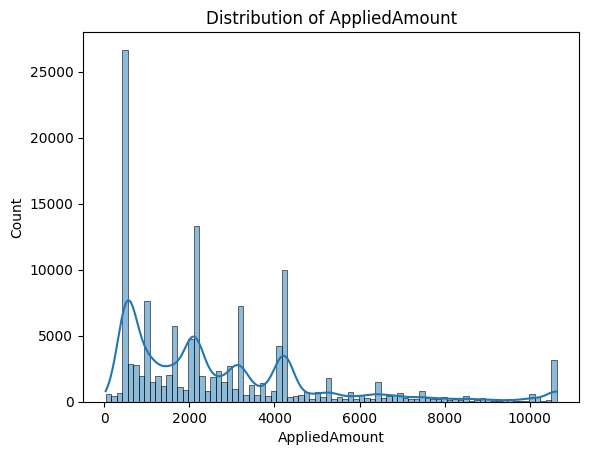

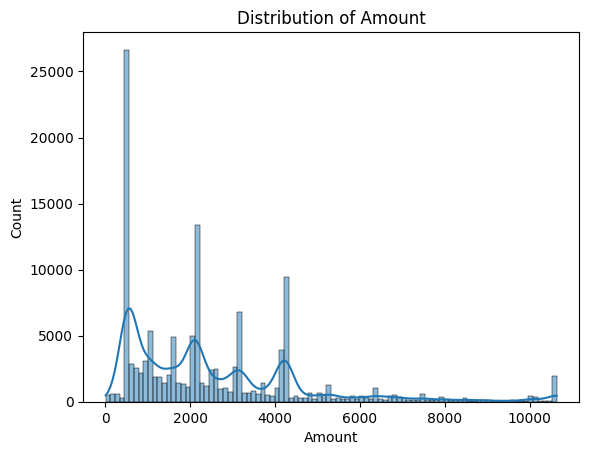

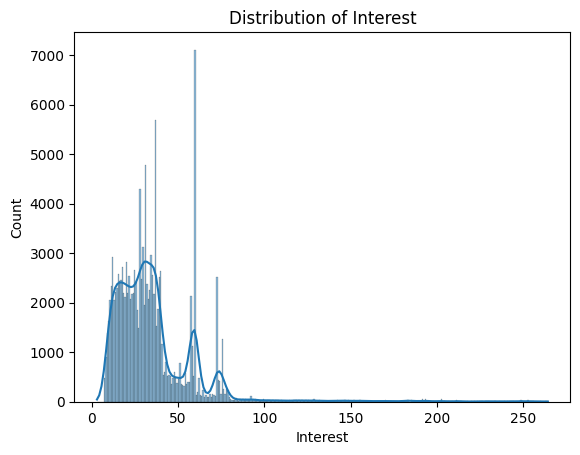

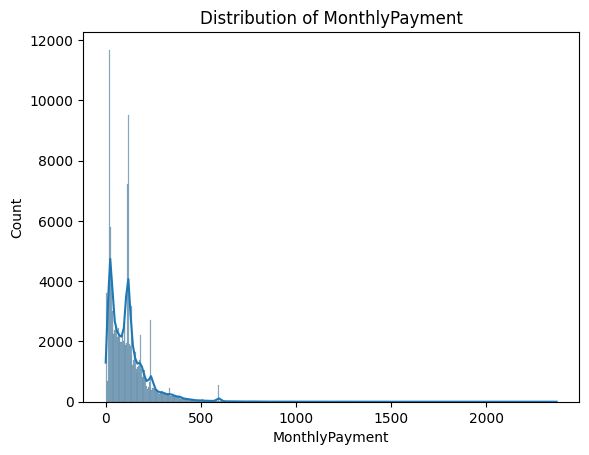

In [41]:
sns.histplot(df['AppliedAmount'], kde=True)
plt.title('Distribution of AppliedAmount')
plt.show()

sns.histplot(df['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.show()

sns.histplot(df['Interest'], kde=True)
plt.title('Distribution of Interest')
plt.show()

sns.histplot(df['MonthlyPayment'], kde=True)
plt.title('Distribution of MonthlyPayment')
plt.show()

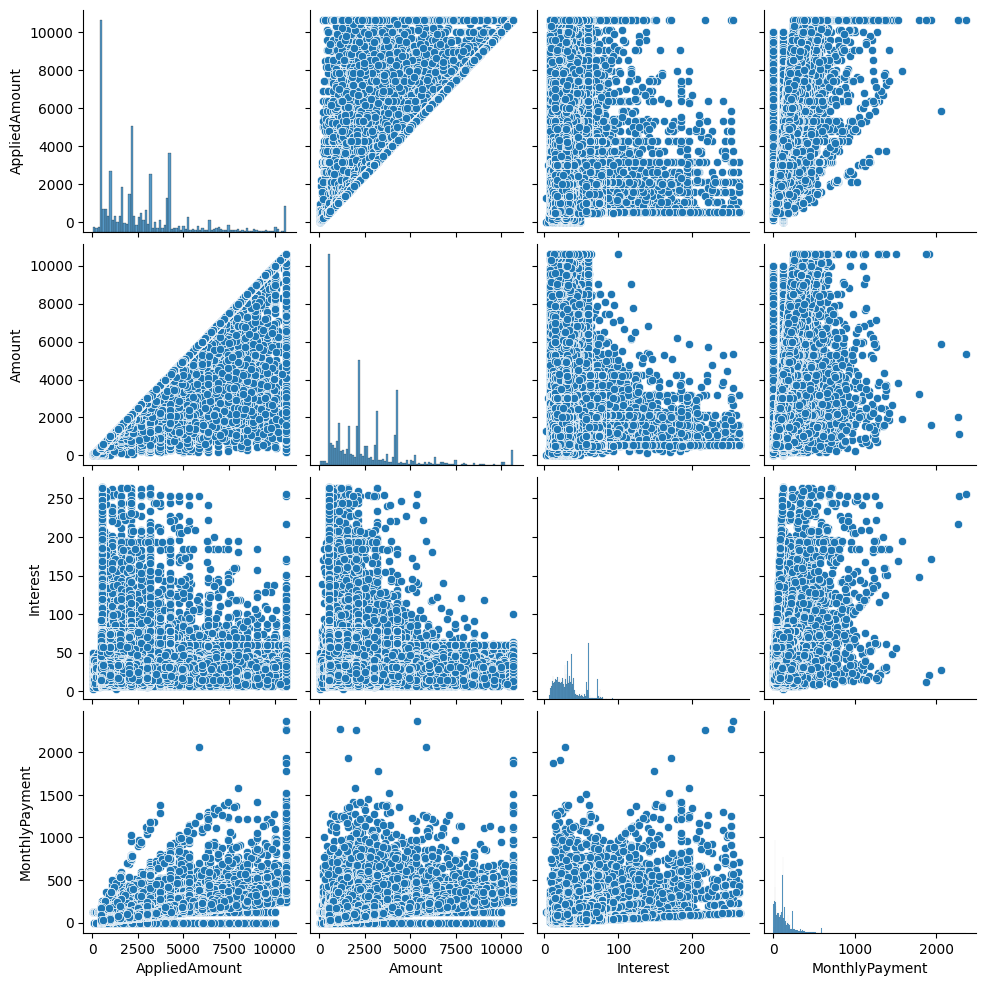

In [42]:
sns.pairplot(df[['AppliedAmount', 'Amount', 'Interest', 'MonthlyPayment']])
plt.show()

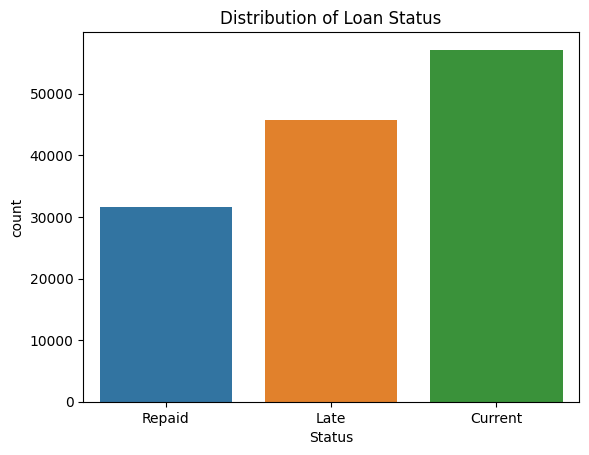

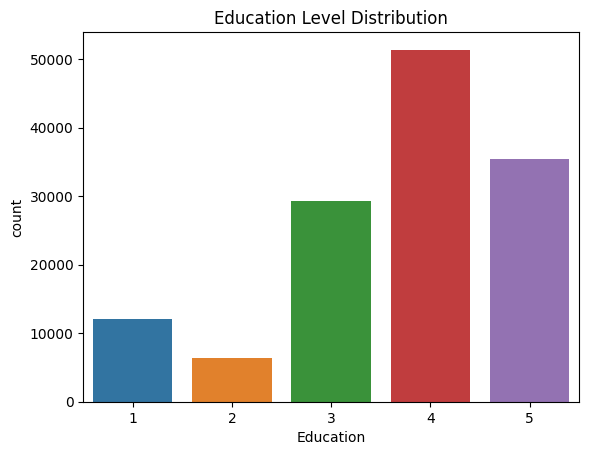

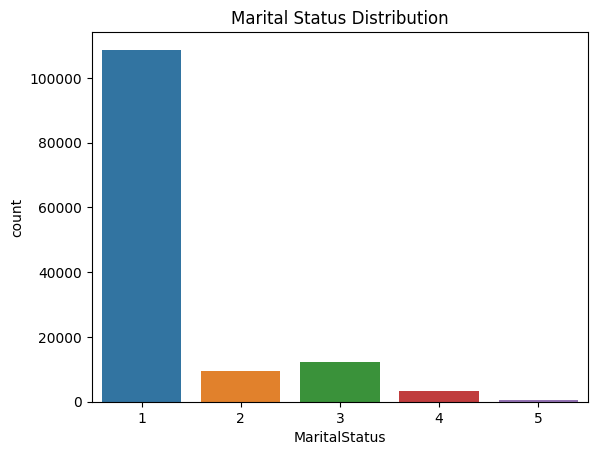

In [44]:
sns.countplot(x='Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

sns.countplot(x='Education', data=df)
plt.title('Education Level Distribution')
plt.show()

sns.countplot(x='MaritalStatus', data=df)
plt.title('Marital Status Distribution')
plt.show()

In [42]:
df.head()

ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0    2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1    2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2    2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3    2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4    2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   

   BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                     0        0    115.0410               True   
1                     0        0    140.6057              False   
2                     0        0    319.5580               True   
3                     0        0     57.5205               True   
4                     0        0    319.5582               True   

  LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0        2009-06-11 16:40:39  2009-06-16       2009-07-27   
1        2009-06-10 15:48:57  2009-06-15       2009-07-15   
2        2009-06-05 19:12:29  2009-06-15       2009-07-27   
3        2009-06-13 12:01:20  2009-06-15       2009-07-15   
4        2009-06-10 10:17:13  2009-06-14       2009-07-27   

  MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0            2010-06-25        2010-06-25                     17   
1            2009-07-15        2009-07-15                     20   
2            2011-02-25        2014-05-13                     20   
3            2010-09-15        2010-09-15                     12   
4            2010-06-25        2010-06-25                     10   

   ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                         5                 2             1   61       1   
1                         4                 2             1   48       1   
2                         6                 2             1   58       1   
3                         7                 2             1   23       1   
4                         4                 2             1   25       1   

  Country  AppliedAmount    Amount  Interest  LoanDuration  MonthlyPayment  \
0      EE       319.5582  115.0408      30.0            12          119.08   
1      EE       191.7349  140.6057      25.0             1          119.08   
2      EE       319.5582  319.5409      25.0            20          119.08   
3      EE       127.8233   57.5205      45.0            15          119.08   
4      EE       319.5582  319.5436      30.0            12          119.08   

   UseOfLoan  Education  MaritalStatus  EmploymentStatus  \
0          7          3              1                 3   
1          7          5              4                 3   
2          2          4              1                 3   
3          0          2              3                 1   
4          6          4              2                 3   

  EmploymentDurationCurrentEmployer  OccupationArea  HomeOwnershipType  \
0                        UpTo3Years               7                  1   
1                    MoreThan5Years              16                  1   
2                        UpTo4Years               9                  1   
3                        UpTo2Years               1                  1   
4                        UpTo2Years               7                  1   

   IncomeFromPrincipalEmployer  IncomeFromPension  IncomeFromFamilyAllowance  \
0                       6000.0                0.0                        0.0   
1                       8300.0                0.0                        0.0   
2                       5000.0                0.0                        0.0   
3                      11000.0                0.0                        0.0   
4                       6800.0                0.0                        0.0   

   IncomeFromSocialWelfare  IncomeFromLeavePay  IncomeFromChildSupport  \
0                      0.0                 0.0                     0.0   
1                      0.0                 0.0                     0.0   
2                    

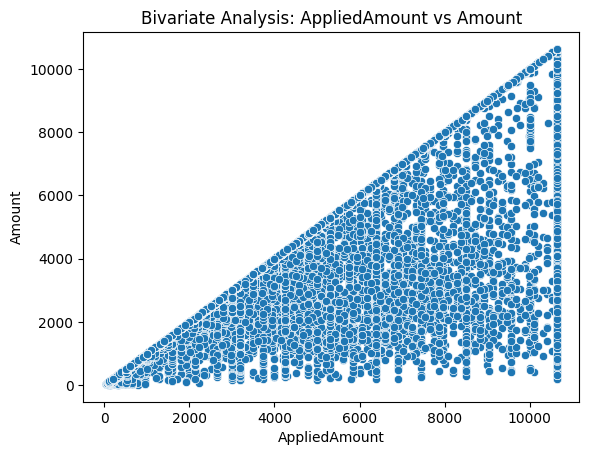

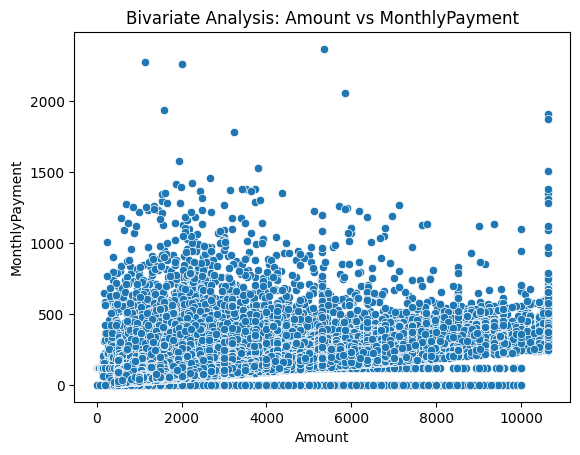

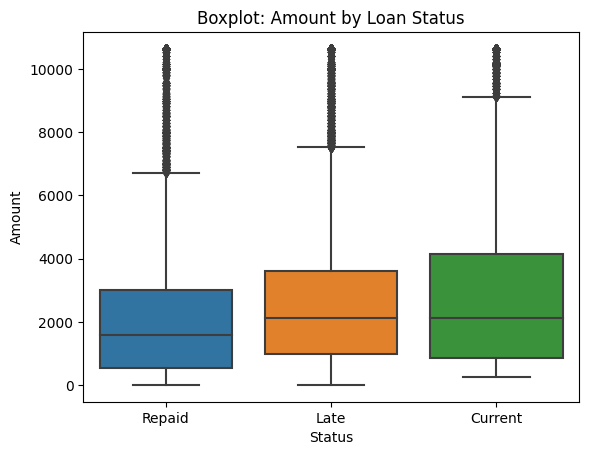

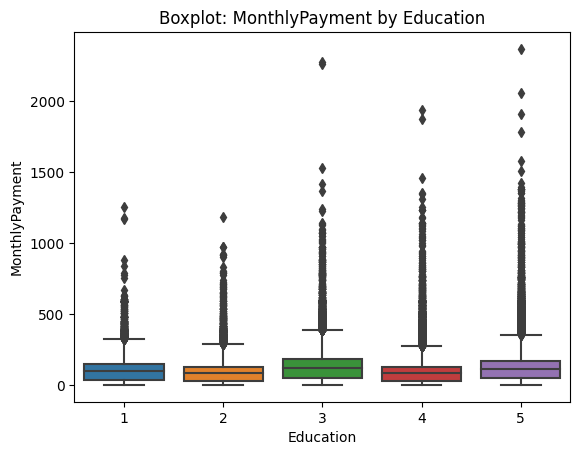

In [45]:
sns.scatterplot(x='AppliedAmount', y='Amount', data=df)
plt.title('Bivariate Analysis: AppliedAmount vs Amount')
plt.show()

sns.scatterplot(x='Amount', y='MonthlyPayment', data=df)
plt.title('Bivariate Analysis: Amount vs MonthlyPayment')
plt.show()


sns.boxplot(x='Status', y='Amount', data=df)
plt.title('Boxplot: Amount by Loan Status')
plt.show()

sns.boxplot(x='Education', y='MonthlyPayment', data=df)
plt.title('Boxplot: MonthlyPayment by Education')
plt.show()

### ENCODING

In [46]:
from sklearn.preprocessing import LabelEncoder

colums_binary=[]
for i in df:
    if df[i].nunique()==2:
        colums_binary.append(i)
colums_binary

['NewCreditCustomer',
 'ActiveScheduleFirstPaymentReached',
 'Restructured',
 'Default_status']

In [47]:
lb=LabelEncoder()
for i in colums_binary:
    df[i] = lb.fit_transform(df[i])

In [48]:
df[colums_binary]

NewCreditCustomer  ActiveScheduleFirstPaymentReached  Restructured  \
0                       1                                  1             0   
1                       0                                  1             0   
2                       1                                  1             1   
3                       1                                  1             0   
4                       1                                  1             0   
...                   ...                                ...           ...   
134524                  1                                  1             0   
134525                  0                                  1             0   
134526                  1                                  1             0   
134527                  0                                  1             1   
134528                  0                                  1             1   

        Default_status  
0                    0  
1                    0  
2                    1  
3                    0  
4                    1  
...                ...  
134524               1  
134525               0  
134526               1  
134527               1  
134528               1  

[134481 rows x 4 columns]

In [49]:
from sklearn.preprocessing import LabelEncoder

# Define columns to encode
columns_to_encode = ['Country', 'EmploymentDurationCurrentEmployer', 'Rating', 'Status','CreditScoreEsMicroL']

# Initialize LabelEncoder
lb = LabelEncoder()

# Apply label encoding to each column individually
for column in columns_to_encode:
    df[column] = lb.fit_transform(df[column])




In [50]:
df

ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0         2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1         2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2         2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3         2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4         2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   
...              ...                  ...                  ...   
134524    2020-01-27  2015-01-02 16:31:36  2015-01-02 16:31:36   
134525    2020-01-27  2015-01-05 16:14:26  2015-01-05 16:14:26   
134526    2020-01-27  2015-01-02 14:04:27  2015-01-02 14:04:27   
134527    2020-01-27  2015-01-05 16:56:12  2015-01-05 16:56:12   
134528    2020-01-27  2015-01-06 11:07:06  2015-01-06 11:07:06   

        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410                  1   
1                          0        0    140.6057                  0   
2                          0        0    319.5580                  1   
3                          0        0     57.5205                  1   
4                          0        0    319.5582                  1   
...                      ...      ...         ...                ...   
134524                  2515        0    485.0000                  1   
134525                  1880        0   1120.0000                  0   
134526                  1975        0    525.0000                  1   
134527                  1840        0   1160.0000                  0   
134528                  2990        0     10.0000                  0   

       LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39  2009-06-16       2009-07-27   
1             2009-06-10 15:48:57  2009-06-15       2009-07-15   
2             2009-06-05 19:12:29  2009-06-15       2009-07-27   
3             2009-06-13 12:01:20  2009-06-15       2009-07-15   
4             2009-06-10 10:17:13  2009-06-14       2009-07-27   
...                           ...         ...              ...   
134524        2015-01-01 07:17:03  2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22  2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47  2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18  2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24  2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03                     13   
134527            2020-02-03        2020-08-03                     16   
134528            2020-02-03        2020-08-12                     11   

        ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                              5                 2             1   61       1   
1                              4                 2             1   48       1   
2                              6                 2             1   58       1   
3                              7                 2             1   23       1   
4                              4                 2             1   25       1   
...                          ...               ...           ...  ...     ...   
134524                         6                 3             4   37       0   
134525                         

In [51]:
df[['WorseLateCategory','Default_status']]

WorseLateCategory  Default_status
0                 91-120               0
1                   180+               0
2                   180+               1
3                  31-60               0
4                   180+               1
...                  ...             ...
134524              180+               1
134525             31-60               0
134526              180+               1
134527              180+               1
134528              180+               1

[134481 rows x 2 columns]

In [52]:
df['Default_status'].value_counts()

0    91604
1    42877
Name: Default_status, dtype: int64

In [53]:
# Convert 'ReportAsOfEOD' to datetime format
df['ReportAsOfEOD'] = pd.to_datetime(df['ReportAsOfEOD'])

# Extract date components
df['Year'] = df['ReportAsOfEOD'].dt.year
df['Month'] = df['ReportAsOfEOD'].dt.month
df['Day'] = df['ReportAsOfEOD'].dt.day
df['DayOfWeek'] = df['ReportAsOfEOD'].dt.dayofweek

# Convert date to ordinal
df['DateOrdinal'] = df['ReportAsOfEOD'].apply(lambda x: x.toordinal())


In [54]:
df

ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0         2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1         2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2         2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3         2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4         2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   
...              ...                  ...                  ...   
134524    2020-01-27  2015-01-02 16:31:36  2015-01-02 16:31:36   
134525    2020-01-27  2015-01-05 16:14:26  2015-01-05 16:14:26   
134526    2020-01-27  2015-01-02 14:04:27  2015-01-02 14:04:27   
134527    2020-01-27  2015-01-05 16:56:12  2015-01-05 16:56:12   
134528    2020-01-27  2015-01-06 11:07:06  2015-01-06 11:07:06   

        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410                  1   
1                          0        0    140.6057                  0   
2                          0        0    319.5580                  1   
3                          0        0     57.5205                  1   
4                          0        0    319.5582                  1   
...                      ...      ...         ...                ...   
134524                  2515        0    485.0000                  1   
134525                  1880        0   1120.0000                  0   
134526                  1975        0    525.0000                  1   
134527                  1840        0   1160.0000                  0   
134528                  2990        0     10.0000                  0   

       LoanApplicationStartedDate    LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39  2009-06-16       2009-07-27   
1             2009-06-10 15:48:57  2009-06-15       2009-07-15   
2             2009-06-05 19:12:29  2009-06-15       2009-07-27   
3             2009-06-13 12:01:20  2009-06-15       2009-07-15   
4             2009-06-10 10:17:13  2009-06-14       2009-07-27   
...                           ...         ...              ...   
134524        2015-01-01 07:17:03  2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22  2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47  2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18  2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24  2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03                     13   
134527            2020-02-03        2020-08-03                     16   
134528            2020-02-03        2020-08-12                     11   

        ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                              5                 2             1   61       1   
1                              4                 2             1   48       1   
2                              6                 2             1   58       1   
3                              7                 2             1   23       1   
4                              4                 2             1   25       1   
...                          ...               ...           ...  ...     ...   
134524                         6                 3             4   37       0   
134525                         

In [55]:
# List of date columns
date_columns = ['LoanDate', 'FirstPaymentDate', 'MaturityDate_Original', 'MaturityDate_Last']

# Convert date columns to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Extract date components
for col in date_columns:
    df[f'{col}_Year'] = df[col].dt.year
    df[f'{col}_Month'] = df[col].dt.month
    df[f'{col}_Day'] = df[col].dt.day
    df[f'{col}_DayOfWeek'] = df[col].dt.dayofweek

# Convert dates to ordinal
for col in date_columns:
    df[f'{col}_Ordinal'] = df[col].apply(lambda x: x.toordinal())

In [56]:
df

ReportAsOfEOD          ListedOnUTC     BiddingStartedOn  \
0         2020-01-27  2009-06-11 16:40:39  2009-06-11 16:40:39   
1         2020-01-27  2009-06-10 15:48:57  2009-06-10 15:48:57   
2         2020-01-27  2009-06-05 19:12:29  2009-06-05 19:12:29   
3         2020-01-27  2009-06-13 12:01:20  2009-06-13 12:01:20   
4         2020-01-27  2009-06-10 10:17:13  2009-06-10 10:17:13   
...              ...                  ...                  ...   
134524    2020-01-27  2015-01-02 16:31:36  2015-01-02 16:31:36   
134525    2020-01-27  2015-01-05 16:14:26  2015-01-05 16:14:26   
134526    2020-01-27  2015-01-02 14:04:27  2015-01-02 14:04:27   
134527    2020-01-27  2015-01-05 16:56:12  2015-01-05 16:56:12   
134528    2020-01-27  2015-01-06 11:07:06  2015-01-06 11:07:06   

        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410                  1   
1                          0        0    140.6057                  0   
2                          0        0    319.5580                  1   
3                          0        0     57.5205                  1   
4                          0        0    319.5582                  1   
...                      ...      ...         ...                ...   
134524                  2515        0    485.0000                  1   
134525                  1880        0   1120.0000                  0   
134526                  1975        0    525.0000                  1   
134527                  1840        0   1160.0000                  0   
134528                  2990        0     10.0000                  0   

       LoanApplicationStartedDate   LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39 2009-06-16       2009-07-27   
1             2009-06-10 15:48:57 2009-06-15       2009-07-15   
2             2009-06-05 19:12:29 2009-06-15       2009-07-27   
3             2009-06-13 12:01:20 2009-06-15       2009-07-15   
4             2009-06-10 10:17:13 2009-06-14       2009-07-27   
...                           ...        ...              ...   
134524        2015-01-01 07:17:03 2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22 2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47 2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18 2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24 2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03                     13   
134527            2020-02-03        2020-08-03                     16   
134528            2020-02-03        2020-08-12                     11   

        ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                              5                 2             1   61       1   
1                              4                 2             1   48       1   
2                              6                 2             1   58       1   
3                              7                 2             1   23       1   
4                              4                 2             1   25       1   
...                          ...               ...           ...  ...     ...   
134524                         6                 3             4   37       0   
134525                         2           

In [57]:
datetime_columns = ['ListedOnUTC', 'BiddingStartedOn', 'LoanApplicationStartedDate']

# Convert datetime columns to datetime format
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])

# Extract datetime components
for col in datetime_columns:
    df[f'{col}_Year'] = df[col].dt.year
    df[f'{col}_Month'] = df[col].dt.month
    df[f'{col}_Day'] = df[col].dt.day
    df[f'{col}_Hour'] = df[col].dt.hour
    df[f'{col}_Minute'] = df[col].dt.minute
    df[f'{col}_Second'] = df[col].dt.second
    df[f'{col}_DayOfWeek'] = df[col].dt.dayofweek

# Convert datetime to ordinal
for col in datetime_columns:
    df[f'{col}_Ordinal'] = df[col].apply(lambda x: x.toordinal())

In [58]:
df

ReportAsOfEOD         ListedOnUTC    BiddingStartedOn  \
0         2020-01-27 2009-06-11 16:40:39 2009-06-11 16:40:39   
1         2020-01-27 2009-06-10 15:48:57 2009-06-10 15:48:57   
2         2020-01-27 2009-06-05 19:12:29 2009-06-05 19:12:29   
3         2020-01-27 2009-06-13 12:01:20 2009-06-13 12:01:20   
4         2020-01-27 2009-06-10 10:17:13 2009-06-10 10:17:13   
...              ...                 ...                 ...   
134524    2020-01-27 2015-01-02 16:31:36 2015-01-02 16:31:36   
134525    2020-01-27 2015-01-05 16:14:26 2015-01-05 16:14:26   
134526    2020-01-27 2015-01-02 14:04:27 2015-01-02 14:04:27   
134527    2020-01-27 2015-01-05 16:56:12 2015-01-05 16:56:12   
134528    2020-01-27 2015-01-06 11:07:06 2015-01-06 11:07:06   

        BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410                  1   
1                          0        0    140.6057                  0   
2                          0        0    319.5580                  1   
3                          0        0     57.5205                  1   
4                          0        0    319.5582                  1   
...                      ...      ...         ...                ...   
134524                  2515        0    485.0000                  1   
134525                  1880        0   1120.0000                  0   
134526                  1975        0    525.0000                  1   
134527                  1840        0   1160.0000                  0   
134528                  2990        0     10.0000                  0   

       LoanApplicationStartedDate   LoanDate FirstPaymentDate  \
0             2009-06-11 16:40:39 2009-06-16       2009-07-27   
1             2009-06-10 15:48:57 2009-06-15       2009-07-15   
2             2009-06-05 19:12:29 2009-06-15       2009-07-27   
3             2009-06-13 12:01:20 2009-06-15       2009-07-15   
4             2009-06-10 10:17:13 2009-06-14       2009-07-27   
...                           ...        ...              ...   
134524        2015-01-01 07:17:03 2015-01-06       2015-03-02   
134525        2015-01-05 07:56:22 2015-01-06       2015-03-05   
134526        2014-12-28 15:01:47 2015-01-06       2015-03-02   
134527        2015-01-05 15:01:18 2015-01-06       2015-03-02   
134528        2015-01-05 20:50:24 2015-01-06       2015-03-03   

       MaturityDate_Original MaturityDate_Last  ApplicationSignedHour  \
0                 2010-06-25        2010-06-25                     17   
1                 2009-07-15        2009-07-15                     20   
2                 2011-02-25        2014-05-13                     20   
3                 2010-09-15        2010-09-15                     12   
4                 2010-06-25        2010-06-25                     10   
...                      ...               ...                    ...   
134524            2020-02-03        2020-02-03                     16   
134525            2020-02-05        2019-02-20                     16   
134526            2020-02-03        2020-02-03                     13   
134527            2020-02-03        2020-08-03                     16   
134528            2020-02-03        2020-08-12                     11   

        ApplicationSignedWeekday  VerificationType  LanguageCode  Age  Gender  \
0                              5                 2             1   61       1   
1                              4                 2             1   48       1   
2                              6                 2             1   58       1   
3                              7                 2             1   23       1   
4                              4                 2             1   25       1   
...                          ...               ...           ...  ...     ...   
134524                         6                 3             4   37       0   
134525                         2                 3             4   

In [59]:
df[['WorseLateCategory','Default_status']]

WorseLateCategory  Default_status
0                 91-120               0
1                   180+               0
2                   180+               1
3                  31-60               0
4                   180+               1
...                  ...             ...
134524              180+               1
134525             31-60               0
134526              180+               1
134527              180+               1
134528              180+               1

[134481 rows x 2 columns]

In [60]:
column_to_drop=['WorseLateCategory','ReportAsOfEOD','ListedOnUTC','BiddingStartedOn','LoanApplicationStartedDate'
               ,'LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn',
               'Year','Month','Day','DayOfWeek','DateOrdinal','LoanDate_Year','LoanDate_Month','LoanDate_Day','LoanDate_DayOfWeek','FirstPaymentDate_Year','FirstPaymentDate_Month',	
               'FirstPaymentDate_Day','FirstPaymentDate_DayOfWeek','MaturityDate_Original_Year','MaturityDate_Original_Month','MaturityDate_Original_Day',
'MaturityDate_Original_DayOfWeek','MaturityDate_Last_Year','MaturityDate_Last_Month','MaturityDate_Last_Day','MaturityDate_Last_DayOfWeek','LoanDate_Ordinal','FirstPaymentDate_Ordinal','MaturityDate_Original_Ordinal','MaturityDate_Last_Ordinal','ListedOnUTC_Year','ListedOnUTC_Month','ListedOnUTC_Day',
        'ListedOnUTC_Hour','ListedOnUTC_Minute','ListedOnUTC_Second','ListedOnUTC_DayOfWeek','BiddingStartedOn_Year',	
'BiddingStartedOn_Month','BiddingStartedOn_Day','BiddingStartedOn_Hour','BiddingStartedOn_Minute','BiddingStartedOn_Second',	
'BiddingStartedOn_DayOfWeek','LoanApplicationStartedDate_Year','LoanApplicationStartedDate_Month','LoanApplicationStartedDate_Day',	
'LoanApplicationStartedDate_Hour','LoanApplicationStartedDate_Minute','LoanApplicationStartedDate_Second',
'LoanApplicationStartedDate_DayOfWeek','ListedOnUTC_Ordinal','BiddingStartedOn_Ordinal','LoanApplicationStartedDate_Ordinal','DefaultDate']
df.drop(column_to_drop, axis = 1, inplace = True)

In [61]:
df

BidsPortfolioManager  BidsApi  BidsManual  NewCreditCustomer  \
0                          0        0    115.0410                  1   
1                          0        0    140.6057                  0   
2                          0        0    319.5580                  1   
3                          0        0     57.5205                  1   
4                          0        0    319.5582                  1   
...                      ...      ...         ...                ...   
134524                  2515        0    485.0000                  1   
134525                  1880        0   1120.0000                  0   
134526                  1975        0    525.0000                  1   
134527                  1840        0   1160.0000                  0   
134528                  2990        0     10.0000                  0   

        ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                          17                         5                 2   
1                          20                         4                 2   
2                          20                         6                 2   
3                          12                         7                 2   
4                          10                         4                 2   
...                       ...                       ...               ...   
134524                     16                         6                 3   
134525                     16                         2                 3   
134526                     13                         6                 1   
134527                     16                         2                 4   
134528                     11                         3                 4   

        LanguageCode  Age  Gender  Country  AppliedAmount     Amount  \
0                  1   61       1        0       319.5582   115.0408   
1                  1   48       1        0       191.7349   140.6057   
2                  1   58       1        0       319.5582   319.5409   
3                  1   23       1        0       127.8233    57.5205   
4                  1   25       1        0       319.5582   319.5436   
...              ...  ...     ...      ...            ...        ...   
134524             4   37       0        2      3000.0000  3000.0000   
134525             4   35       0        2      3000.0000  3000.0000   
134526             4   40       0        2      2500.0000  2500.0000   
134527             1   47       1        0      3000.0000  3000.0000   
134528             1   21       1        0      3000.0000  3000.0000   

        Interest  LoanDuration  MonthlyPayment  UseOfLoan  Education  \
0          30.00            12          119.08          7          3   
1          25.00             1          119.08          7          5   
2          25.00            20          119.08          2          4   
3          45.00            15          119.08          0          2   
4          30.00            12          119.08          6          4   
...          ...           ...             ...        ...        ...   
134524     31.01            60          107.68          0          3   
134525     18.25            60           85.33          2          3   
134526     24.83            60           80.42          0          3   
134527     17.74            60           84.51          7          5   
134528     30.50            60          106.74          0          4   

        MaritalStatus  EmploymentStatus  EmploymentDurationCurrentEmployer  \
0                   1                 3                                  6   
1                   4                 3                                  0   
2                   1                 3                                  7   
3                   3                 1                                  5   
4                   2                 3                                  5   
...               ..

### Outliers

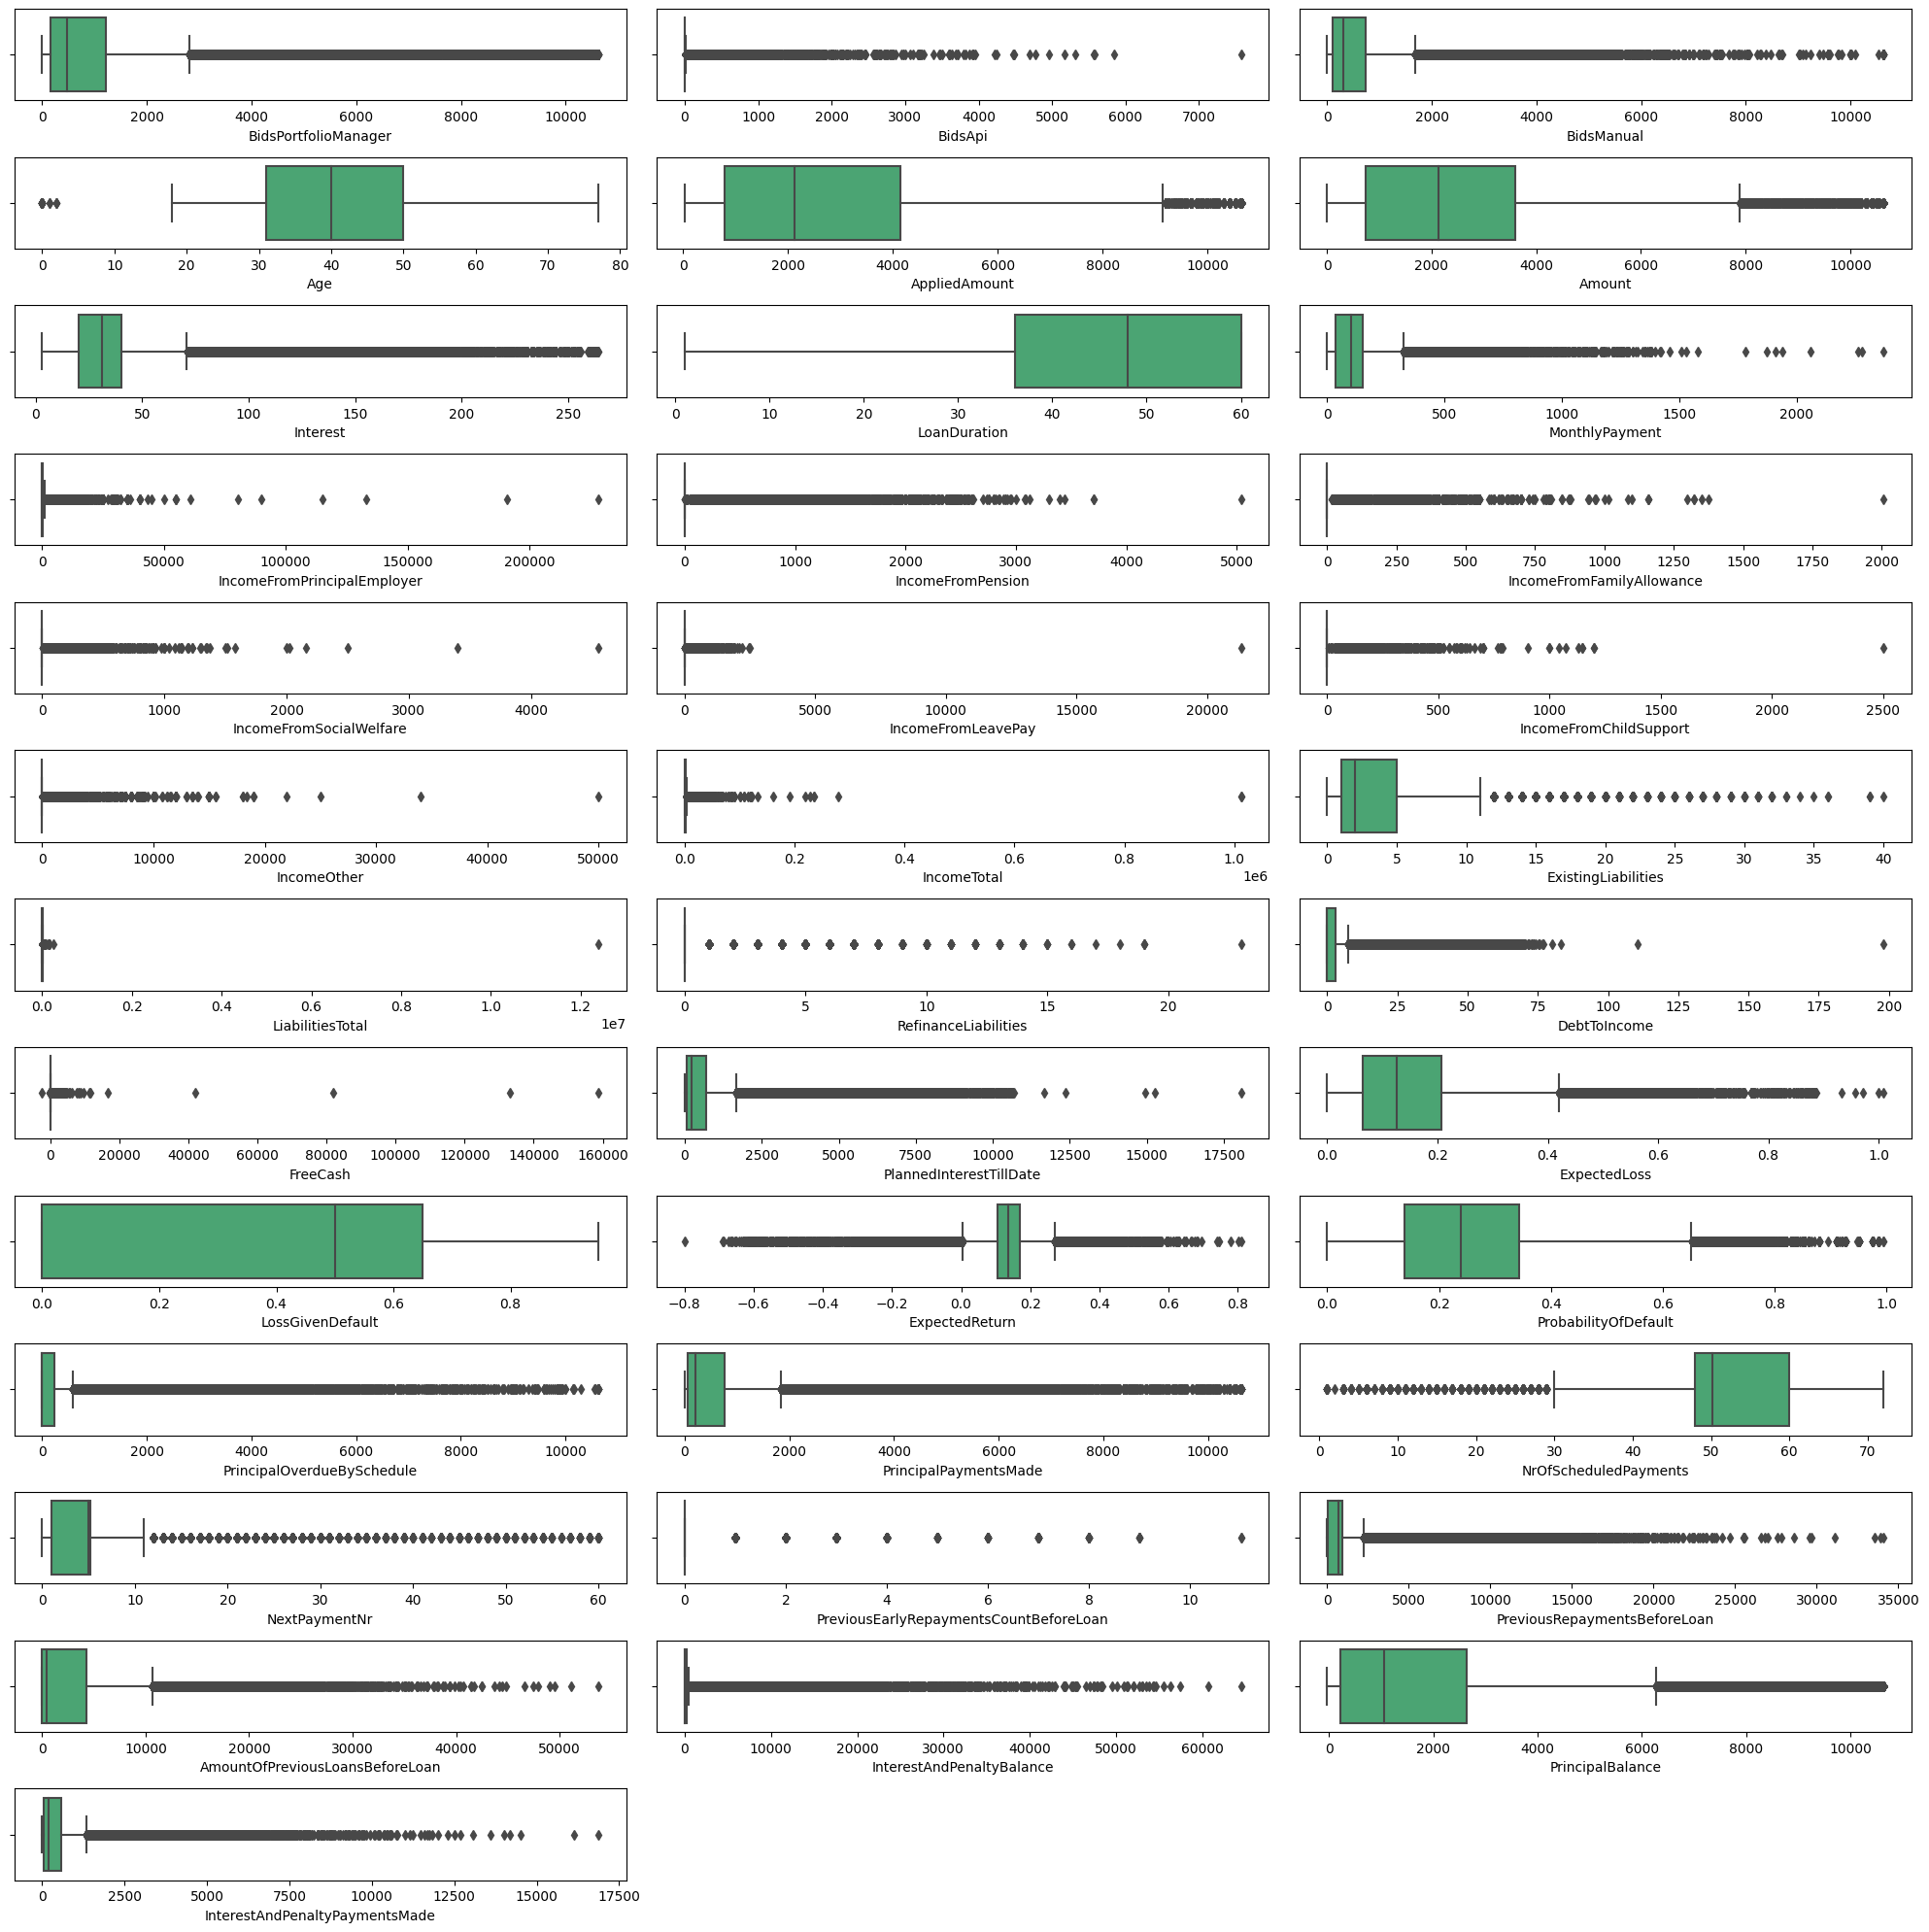

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to include for boxplots
include_columns = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount', 'Amount', 
                   'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeFromPrincipalEmployer', 
                   'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 
                   'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 
                   'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 
                   'FreeCash', 'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault', 
                   'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 
                   'PrincipalPaymentsMade', 'NrOfScheduledPayments', 'NextPaymentNr', 
                   'PreviousEarlyRepaymentsCountBeforeLoan', 'PreviousRepaymentsBeforeLoan', 
                   'AmountOfPreviousLoansBeforeLoan', 'InterestAndPenaltyBalance', 'PrincipalBalance', 
                   'InterestAndPenaltyPaymentsMade']

# Select only the columns you want to include for the boxplots
df_filtered = df[include_columns]

# Calculate the number of rows and columns needed for the subplots (assuming 3 columns per row)
num_columns = len(include_columns)
num_rows = (num_columns + 2) // 3

# Create a figure and set of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over the DataFrame's columns and plot using Seaborn
for i, column in enumerate(df_filtered.columns):
    sns.boxplot(x=df_filtered[column], ax=axes[i], color='#3CB371')
    # axes[i].set_title(column)

# If there are fewer columns than subplots, hide the extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [63]:
import numpy as np

# List of columns to include
include_columns = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount', 'Amount', 
                   'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeFromPrincipalEmployer', 
                   'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 
                   'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 
                   'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 
                   'FreeCash', 'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault', 
                   'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 
                   'PrincipalPaymentsMade', 'NrOfScheduledPayments', 'NextPaymentNr', 
                   'PreviousEarlyRepaymentsCountBeforeLoan', 'PreviousRepaymentsBeforeLoan', 
                   'AmountOfPreviousLoansBeforeLoan', 'InterestAndPenaltyBalance', 'PrincipalBalance', 
                   'InterestAndPenaltyPaymentsMade']

# Iterate over each column in the DataFrame
for column in include_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the maximum and minimum thresholds for outliers
    Maximum = Q3 + 1.5 * IQR
    Minimum = Q1 - 1.5 * IQR
    
    # Use vectorized operations to replace outliers with the thresholds
    df[column] = np.where(df[column] > Maximum, Maximum, 
                          np.where(df[column] < Minimum, Minimum, df[column]))


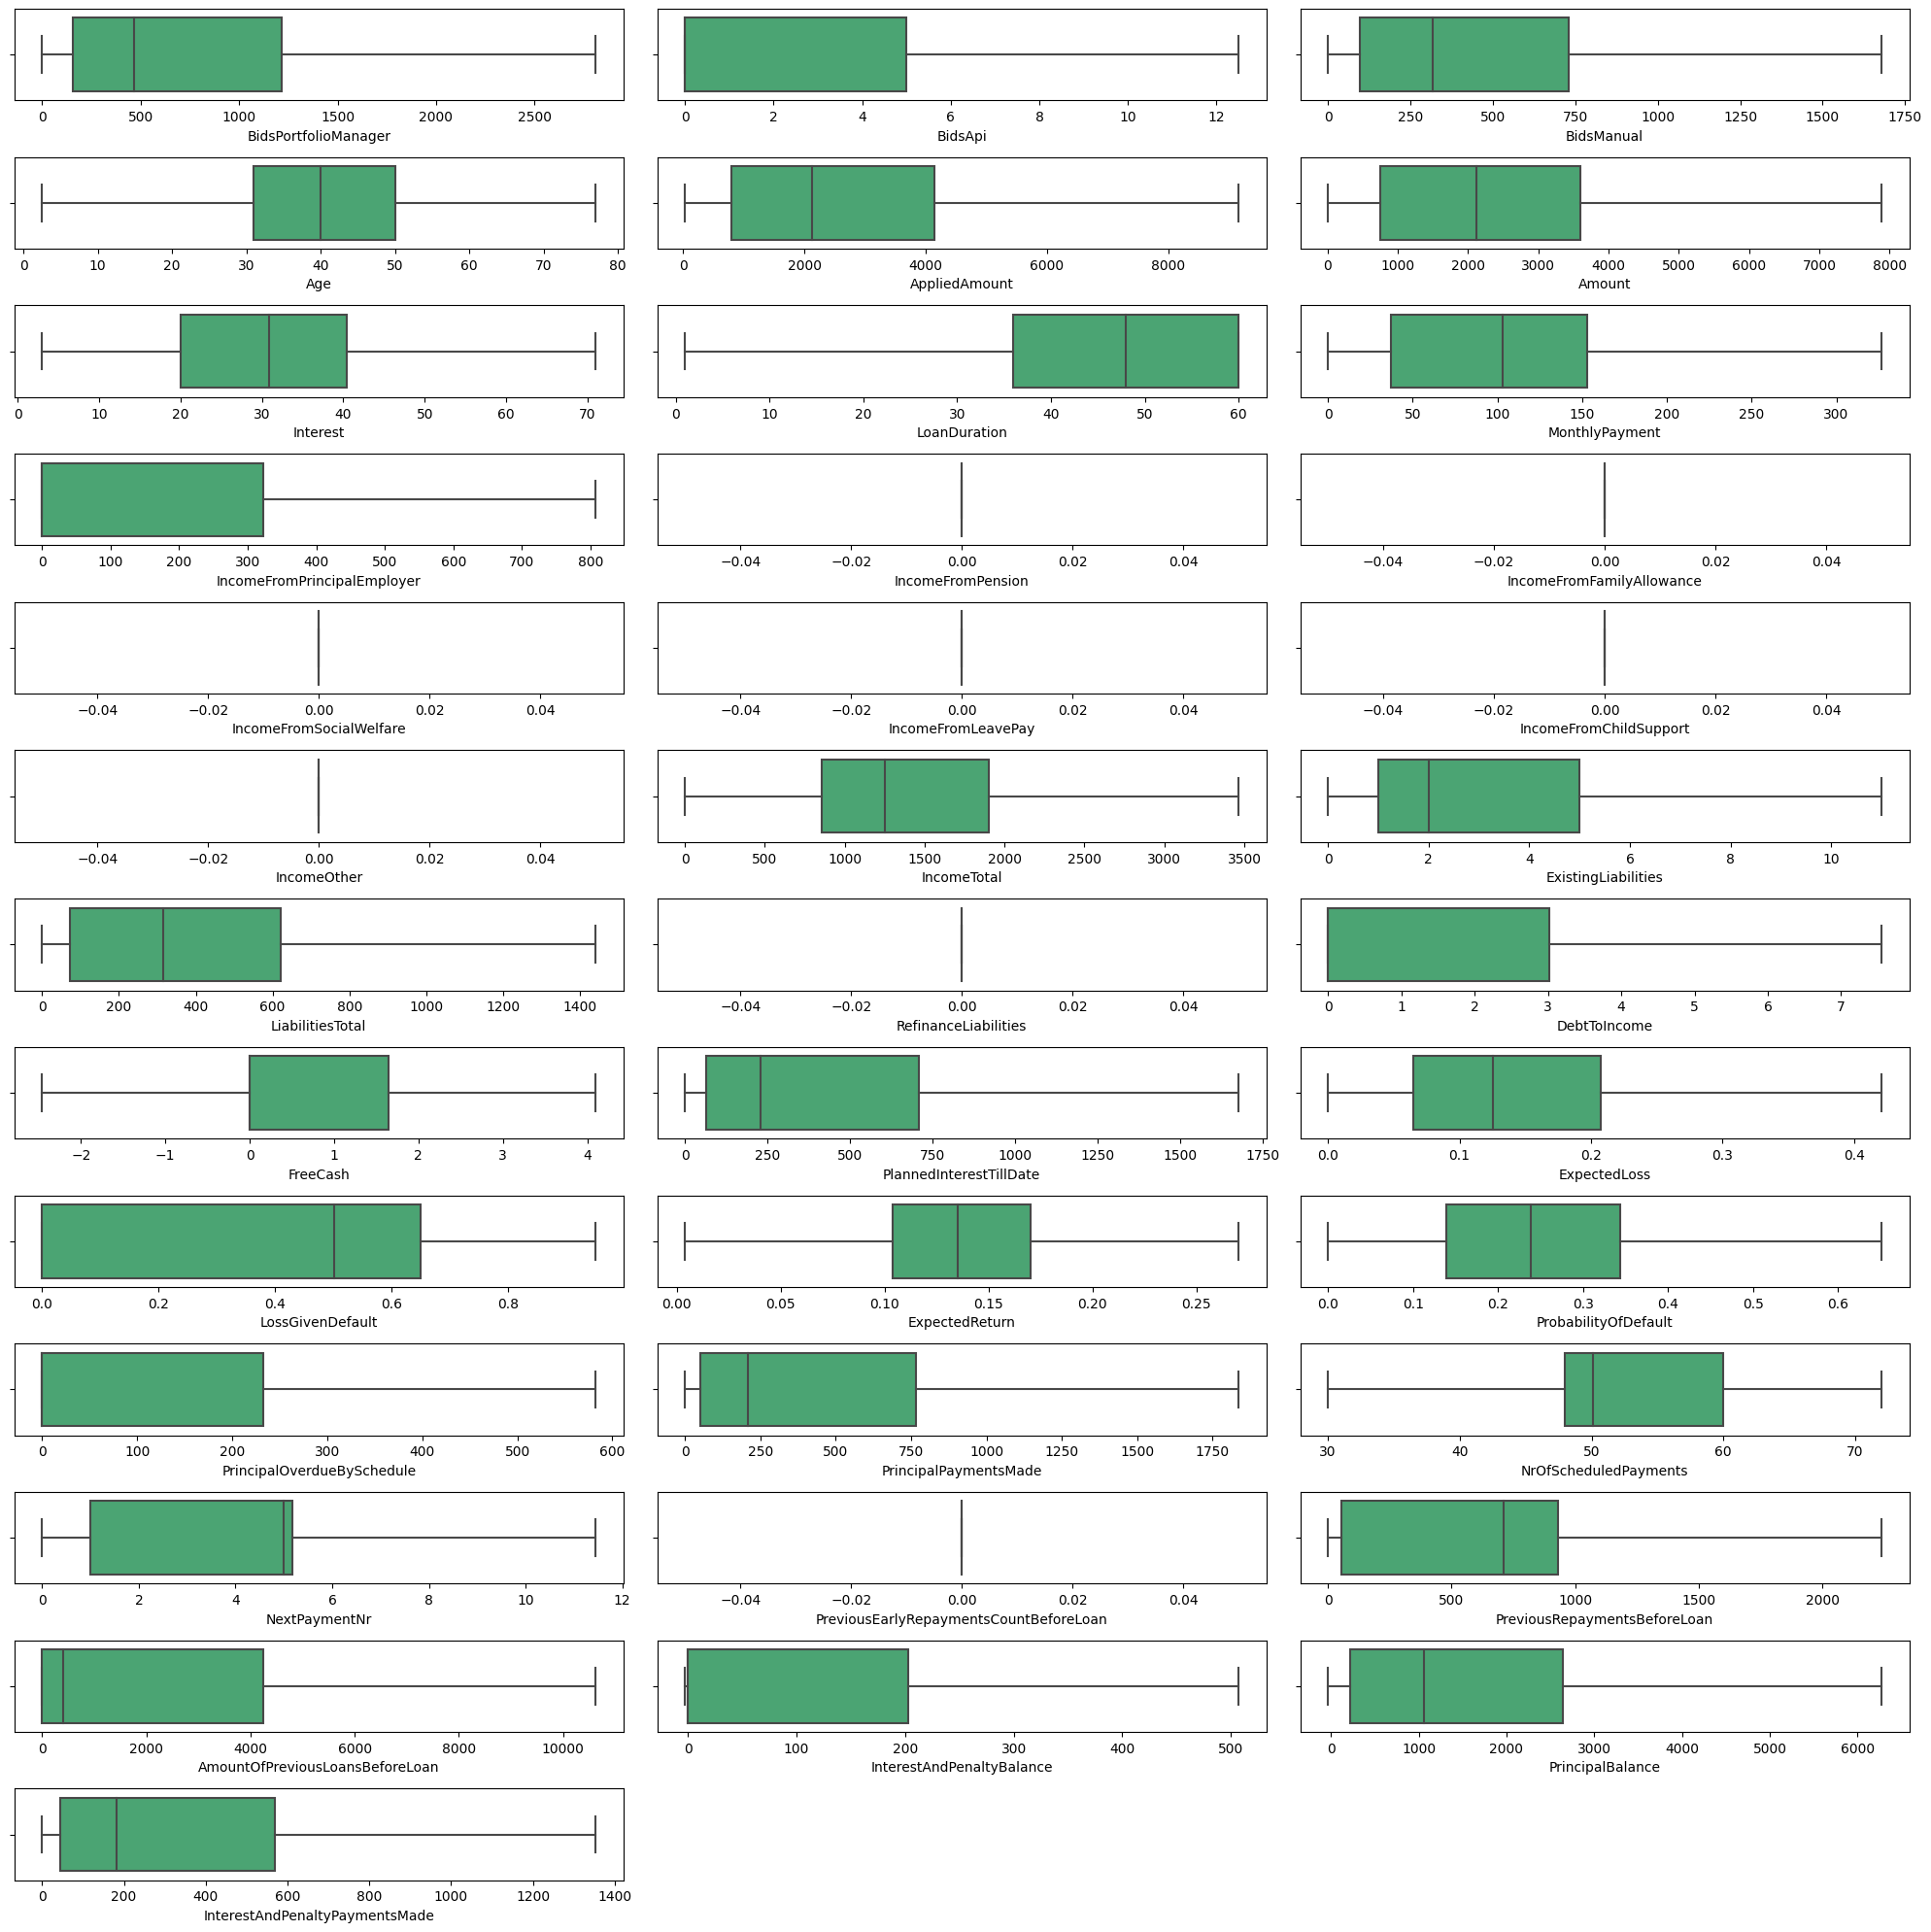

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to include for boxplots
include_columns = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount', 'Amount', 
                   'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeFromPrincipalEmployer', 
                   'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 
                   'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 
                   'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 
                   'FreeCash', 'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault', 
                   'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 
                   'PrincipalPaymentsMade', 'NrOfScheduledPayments', 'NextPaymentNr', 
                   'PreviousEarlyRepaymentsCountBeforeLoan', 'PreviousRepaymentsBeforeLoan', 
                   'AmountOfPreviousLoansBeforeLoan', 'InterestAndPenaltyBalance', 'PrincipalBalance', 
                   'InterestAndPenaltyPaymentsMade']

# Select only the columns you want to include for the boxplots
df_filtered = df[include_columns]

# Calculate the number of rows and columns needed for the subplots (assuming 3 columns per row)
num_columns = len(include_columns)
num_rows = (num_columns + 2) // 3

# Create a figure and set of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over the DataFrame's columns and plot using Seaborn
for i, column in enumerate(df_filtered.columns):
    sns.boxplot(x=df_filtered[column], ax=axes[i], color='#3CB371')
    # axes[i].set_title(column)

# If there are fewer columns than subplots, hide the extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Standardise

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# List of columns to include for scaling
include_columns = ['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount', 'Amount', 
                   'Interest', 'LoanDuration', 'MonthlyPayment', 'IncomeFromPrincipalEmployer', 
                   'IncomeFromPension', 'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 
                   'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 
                   'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 
                   'FreeCash', 'PlannedInterestTillDate', 'ExpectedLoss', 'LossGivenDefault', 
                   'ExpectedReturn', 'ProbabilityOfDefault', 'PrincipalOverdueBySchedule', 
                   'PrincipalPaymentsMade', 'NrOfScheduledPayments', 'NextPaymentNr', 
                   'PreviousEarlyRepaymentsCountBeforeLoan', 'PreviousRepaymentsBeforeLoan', 
                   'AmountOfPreviousLoansBeforeLoan', 'InterestAndPenaltyBalance', 'PrincipalBalance', 
                   'InterestAndPenaltyPaymentsMade']

# Initialize the scaler
scaler = StandardScaler()
scaler.fit(df[include_columns])
# Fit and transform the scaler on the columns to be scaled
scaled_values = scaler.transform(df[include_columns])

# Create a DataFrame with the scaled values
df_scaled = pd.DataFrame(scaled_values, index=df.index, columns=include_columns)

# Combine the scaled columns with the remaining columns from the original DataFrame
df_combined = pd.concat([df_scaled, df.drop(include_columns, axis=1)], axis=1)


In [66]:
df_combined.head()

BidsPortfolioManager   BidsApi  BidsManual       Age  AppliedAmount  \
0              -0.93825 -0.635923   -0.738456  1.634703      -1.056070   
1              -0.93825 -0.635923   -0.688349  0.581454      -1.113168   
2              -0.93825 -0.635923   -0.337604  1.391645      -1.056070   
3              -0.93825 -0.635923   -0.851196 -1.444023      -1.141718   
4              -0.93825 -0.635923   -0.337603 -1.281985      -1.056070   

     Amount  Interest  LoanDuration  MonthlyPayment  \
0 -1.207873 -0.208563     -2.247038        0.076646   
1 -1.194792 -0.493627     -2.970727        0.076646   
2 -1.103239 -0.493627     -1.720720        0.076646   
3 -1.237303  0.646629     -2.049669        0.076646   
4 -1.103238 -0.208563     -2.247038        0.076646   

   IncomeFromPrincipalEmployer  IncomeFromPension  IncomeFromFamilyAllowance  \
0                     1.901529                0.0                        0.0   
1                     1.901529                0.0                        0.0   
2                     1.901529                0.0                        0.0   
3                     1.901529                0.0                        0.0   
4                     1.901529                0.0                        0.0   

   IncomeFromSocialWelfare  IncomeFromLeavePay  IncomeFromChildSupport  \
0                      0.0                 0.0                     0.0   
1                      0.0                 0.0                     0.0   
2                      0.0                 0.0                     0.0   
3                      0.0                 0.0                     0.0   
4                      0.0                 0.0                     0.0   

   IncomeOther  IncomeTotal  ExistingLiabilities  LiabilitiesTotal  \
0          0.0     2.520828            -1.027613          -1.01909   
1          0.0     2.520828            -1.027613          -1.01909   
2          0.0     2.520828            -1.027613          -1.01909   
3          0.0     2.520828            -1.027613          -1.01909   
4          0.0     2.520828            -1.027613          -1.01909   

   RefinanceLiabilities  DebtToIncome  FreeCash  PlannedInterestTillDate  \
0                   0.0     -0.577848  -0.57847                -0.309560   
1                   0.0     -0.577848  -0.57847                -0.792224   
2                   0.0     -0.577848  -0.57847                -0.524683   
3                   0.0     -0.577848  -0.57847                -0.355451   
4                   0.0     -0.577848  -0.57847                 0.599649   

   ExpectedLoss  LossGivenDefault  ExpectedReturn  ProbabilityOfDefault  \
0      0.055198          0.003194        0.025694             -0.005287   
1      0.055198          0.003194        0.025694             -0.005287   
2      0.055198          0.003194        0.025694             -0.005287   
3      0.055198          0.003194        0.025694             -0.005287   
4      0.055198          0.003194        0.025694             -0.005287   

   PrincipalOverdueBySchedule  PrincipalPaymentsMade  NrOfScheduledPayments  \
0                    0.626971              -0.643465              -0.035948   
1                    0.626971              -0.603409              -0.035948   
2                    0.002136              -0.505350              -0.035948   
3                    0.626971              -0.733589              -0.035948   
4                    0.626971              -0.323046              -0.035948   

   NextPaymentNr  PreviousEarlyRepaymentsCountBeforeLoan  \
0       0.263259                                     0.0   
1       0.263259                                     0.0   
2       0.263259                                     0.0   
3       0.263259                                     0.0   
4       0.263259                                     0.0   

   PreviousRepaymentsBeforeLoan  AmountOfPreviousLoansBeforeLoan  \
0                     -1.044581                        -0.695657   


In [67]:
df = df_combined[df.columns]

In [68]:
df.head()

BidsPortfolioManager   BidsApi  BidsManual  NewCreditCustomer  \
0              -0.93825 -0.635923   -0.738456                  1   
1              -0.93825 -0.635923   -0.688349                  0   
2              -0.93825 -0.635923   -0.337604                  1   
3              -0.93825 -0.635923   -0.851196                  1   
4              -0.93825 -0.635923   -0.337603                  1   

   ApplicationSignedHour  ApplicationSignedWeekday  VerificationType  \
0                     17                         5                 2   
1                     20                         4                 2   
2                     20                         6                 2   
3                     12                         7                 2   
4                     10                         4                 2   

   LanguageCode       Age  Gender  Country  AppliedAmount    Amount  Interest  \
0             1  1.634703       1        0      -1.056070 -1.207873 -0.208563   
1             1  0.581454       1        0      -1.113168 -1.194792 -0.493627   
2             1  1.391645       1        0      -1.056070 -1.103239 -0.493627   
3             1 -1.444023       1        0      -1.141718 -1.237303  0.646629   
4             1 -1.281985       1        0      -1.056070 -1.103238 -0.208563   

   LoanDuration  MonthlyPayment  UseOfLoan  Education  MaritalStatus  \
0     -2.247038        0.076646          7          3              1   
1     -2.970727        0.076646          7          5              4   
2     -1.720720        0.076646          2          4              1   
3     -2.049669        0.076646          0          2              3   
4     -2.247038        0.076646          6          4              2   

   EmploymentStatus  EmploymentDurationCurrentEmployer  OccupationArea  \
0                 3                                  6               7   
1                 3                                  0              16   
2                 3                                  7               9   
3                 1                                  5               1   
4                 3                                  5               7   

   HomeOwnershipType  IncomeFromPrincipalEmployer  IncomeFromPension  \
0                  1                     1.901529                0.0   
1                  1                     1.901529                0.0   
2                  1                     1.901529                0.0   
3                  1                     1.901529                0.0   
4                  1                     1.901529                0.0   

   IncomeFromFamilyAllowance  IncomeFromSocialWelfare  IncomeFromLeavePay  \
0                        0.0                      0.0                 0.0   
1                        0.0                      0.0                 0.0   
2                        0.0                      0.0                 0.0   
3                        0.0                      0.0                 0.0   
4                        0.0                      0.0                 0.0   

   IncomeFromChildSupport  IncomeOther  IncomeTotal  ExistingLiabilities  \
0                     0.0          0.0     2.520828            -1.027613   
1                     0.0          0.0     2.520828            -1.027613   
2                     0.0          0.0     2.520828            -1.027613   
3                     0.0          0.0     2.520828            -1.027613   
4                     0.0          0.0     2.520828            -1.027613   

   LiabilitiesTotal  RefinanceLiabilities  DebtToIncome  FreeCash  \
0          -1.01909                   0.0     -0.577848  -0.57847   
1          -1.01909                   0.0     -0.577848  -0.57847   
2          -1.01909                   0.0     -0.577848  -0.57847   
3          -1.01909                   0.0     -0.577848  -0.57847   
4          -1.01909                   0.0     -0.577848  -0.57847   

   MonthlyPaymentDay  Active

In [69]:
df.shape

(134481, 60)

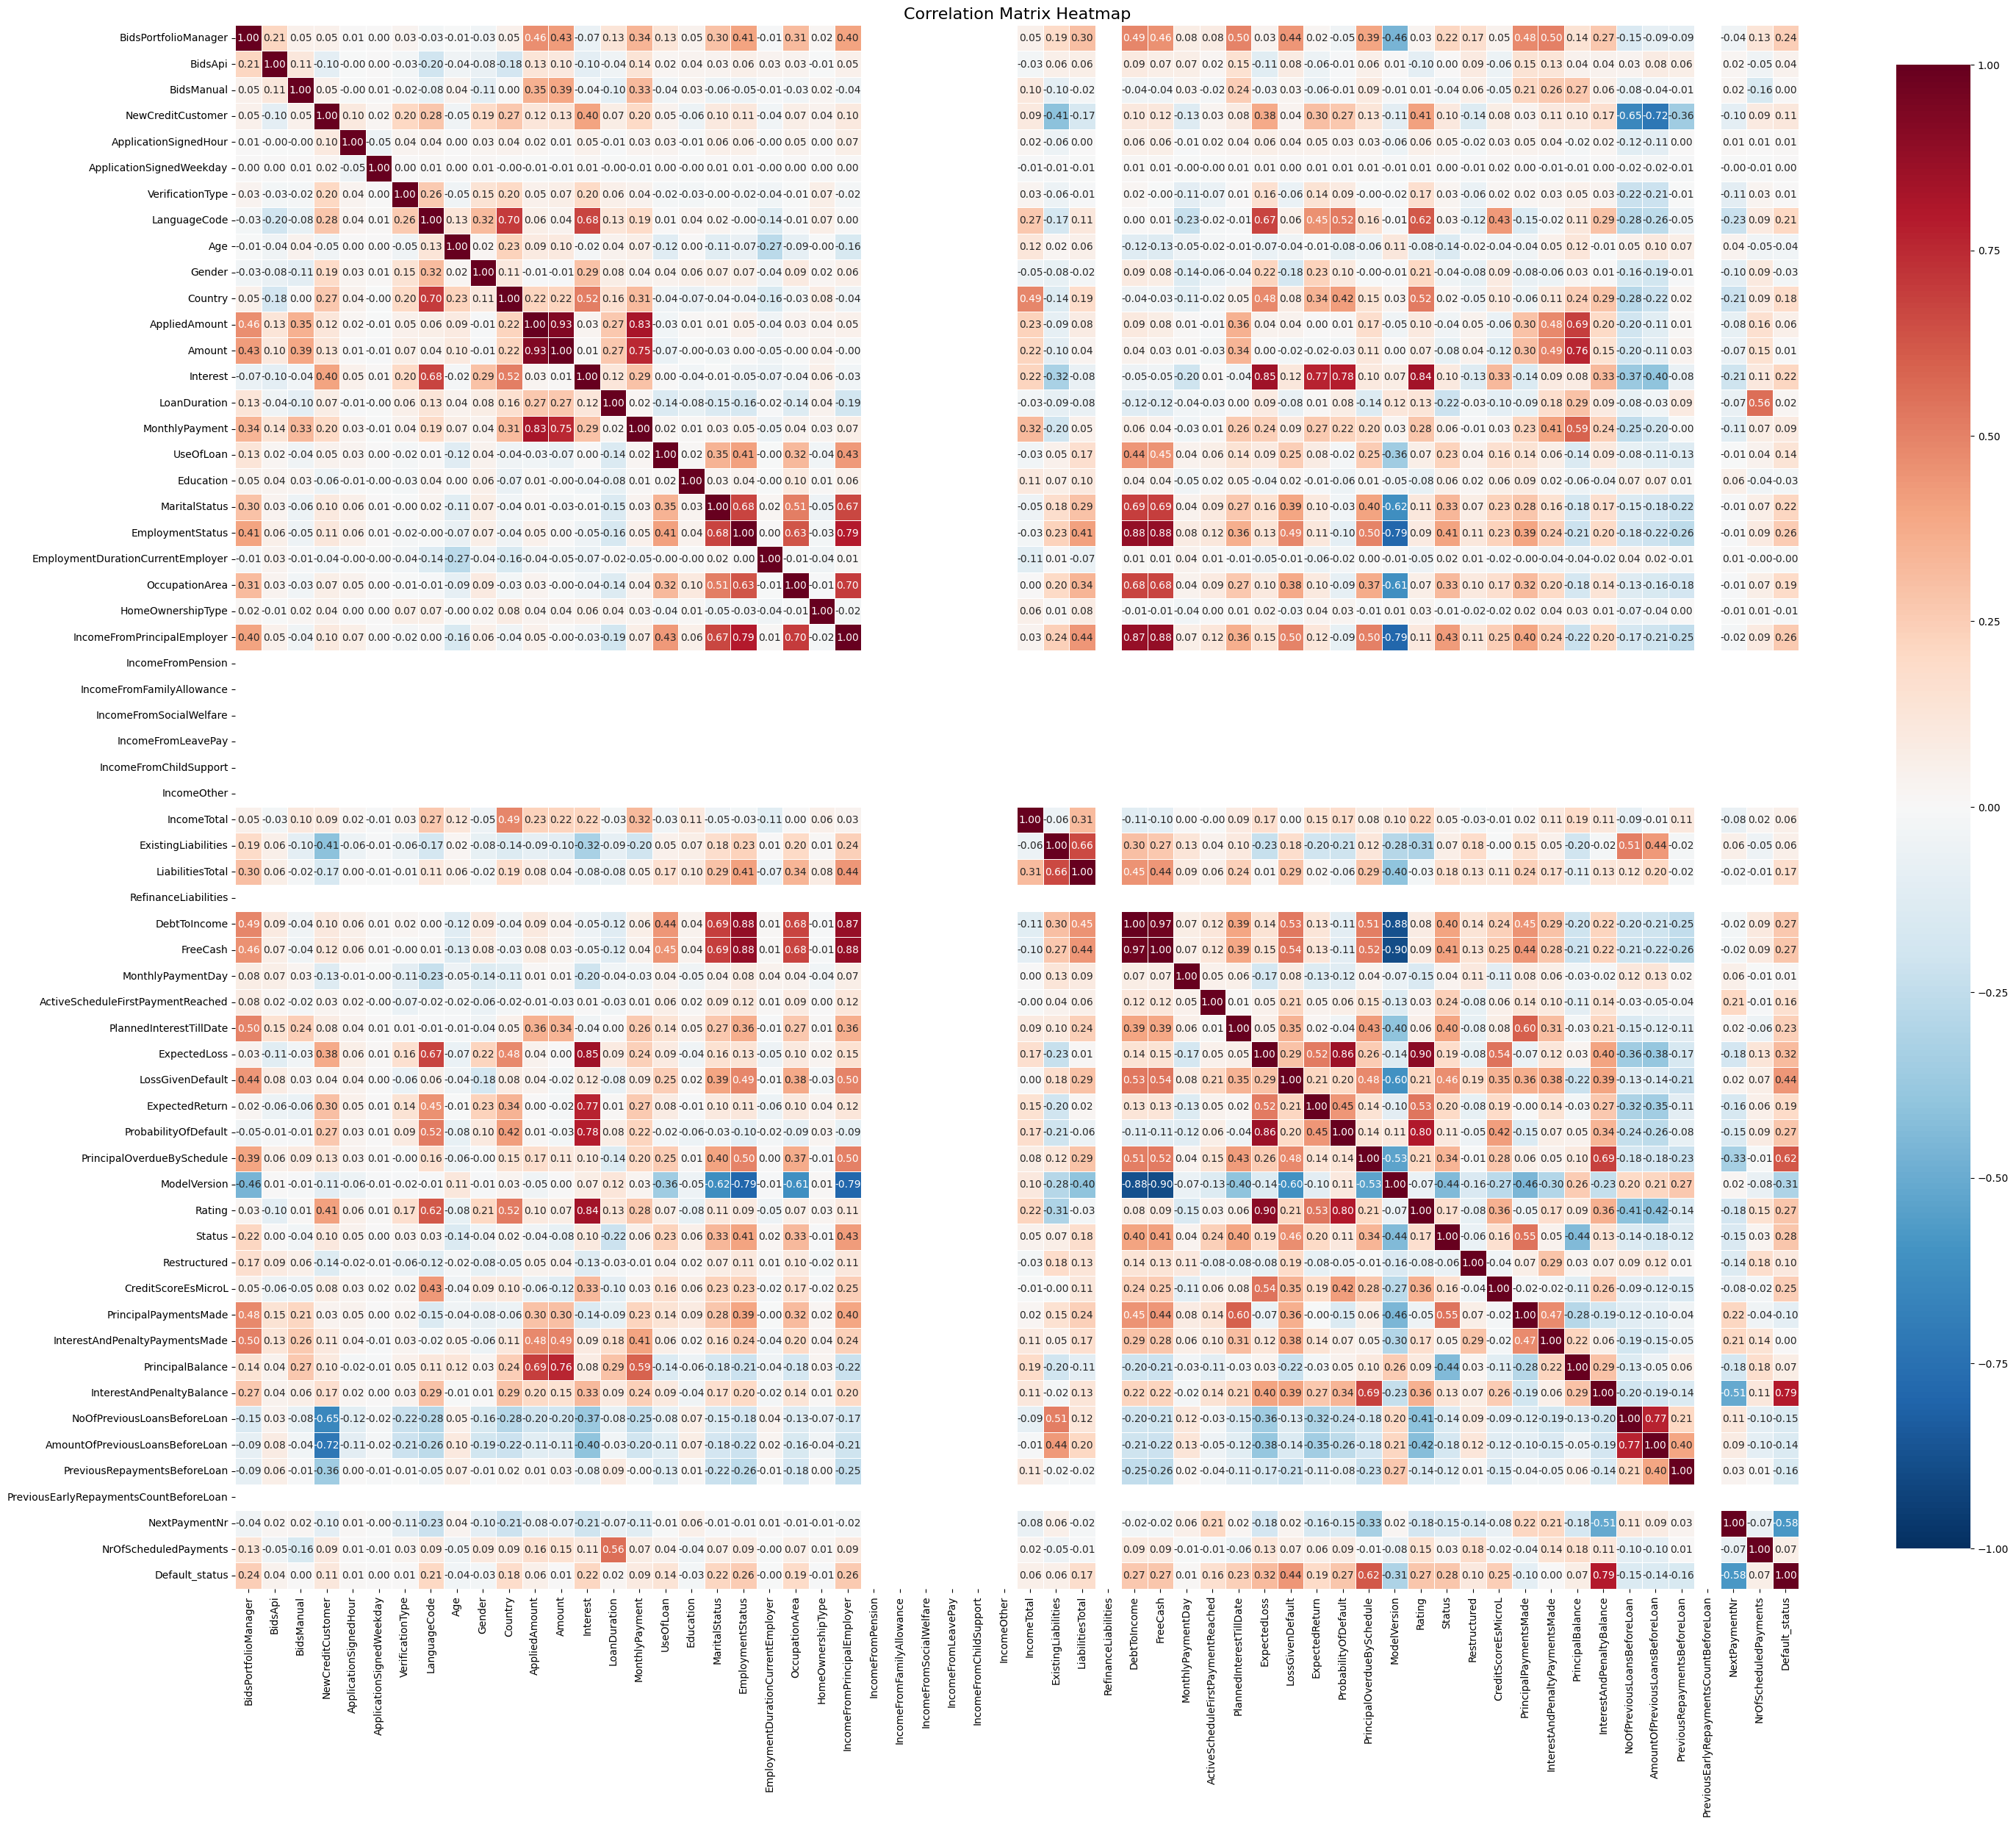

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Draw the heatmap with improved readability
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt='.2f', vmin=-1, vmax=1, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .7})

# Rotate y-axis labels for better fit
plt.yticks(rotation=0)

# Add title and adjust layout
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()


In [71]:
high_corr_colms=[]
for i in df:
    corr = df['Default_status'].corr(df[i])
    if corr > 0.3 or corr <-0.3:
        high_corr_colms.append(i)
high_corr_colms
# df['is_canceled'].corr(df['hotel'])

['ExpectedLoss',
 'LossGivenDefault',
 'PrincipalOverdueBySchedule',
 'ModelVersion',
 'InterestAndPenaltyBalance',
 'NextPaymentNr',
 'Default_status']

In [72]:
df = df[high_corr_colms]

In [73]:
df

ExpectedLoss  LossGivenDefault  PrincipalOverdueBySchedule  \
0           0.055198          0.003194                    0.626971   
1           0.055198          0.003194                    0.626971   
2           0.055198          0.003194                    0.002136   
3           0.055198          0.003194                    0.626971   
4           0.055198          0.003194                    0.626971   
...              ...               ...                         ...   
134524      0.023172          1.575499                   -0.621306   
134525     -0.893010          1.575499                   -0.621306   
134526     -0.393467          1.575499                    2.372287   
134527     -1.065834          0.773303                    0.275732   
134528     -0.275710          0.773303                    2.499387   

        ModelVersion  InterestAndPenaltyBalance  NextPaymentNr  Default_status  
0                  6                  -0.614478       0.263259               0  
1                  6                  -0.614478       0.263259               0  
2                  6                   1.409196       0.263259               1  
3                  6                  -0.614478       0.263259               0  
4                  6                  -0.614478       0.263259               1  
...              ...                        ...            ...             ...  
134524             1                  -0.614478       0.263259               1  
134525             1                  -0.614478       0.263259               0  
134526             1                   1.863370      -1.218382               1  
134527             1                  -0.614478       0.263259               1  
134528             1                   1.863370      -1.218382               1  

[134481 rows x 7 columns]

### Handle imbalance in Target Variable

In [79]:
!pip show scikit-learn
!pip show imbalanced-learn


Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, scikeras
Name: imbalanced-learn
Version: 0.11.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [82]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 262.6 kB/s eta 0:00:42
   ---------------------------------------- 0.0/11.0 MB 279.3 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 581.0 kB/s eta 0:00:19
    --------------------------------------- 0.1/11.0 MB 655.8 kB/s eta 0:00:17
    --------------------------------------- 0.2/11.0 MB 888.4 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 808.4 kB/s eta 0:00:14
   - -------------------------------------- 0.3/11.0 MB 842.9 kB/s eta 0:00:13
   - -------------------------------------- 0.4/11.0 MB 983.0 kB/s eta 0:00:11
   - -------------------------------------- 0.5/11.0 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.6/11.0 MB 1.3 MB/s eta 0:00

  You can safely remove it manually.


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.3 kB 393.8 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 393.8 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/258.3 kB 393.8 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.3 kB 383.3 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/258.3 kB 409.6 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/258.3 kB 426.7 kB/s eta 0:00:01
   ------------

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x=df.drop('Default_status',axis=1)
y=df['Default_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
x_train_sampled,y_train_sampled = smote.fit_resample(x_train,y_train)


In [84]:
df = pd.concat([x_train_sampled, y_train_sampled], axis=1)

In [85]:
df['Default_status'].value_counts()

1    73401
0    73401
Name: Default_status, dtype: int64

In [86]:
df

ExpectedLoss  LossGivenDefault  PrincipalOverdueBySchedule  \
0          -0.825695         -0.019376                   -0.304522   
1          -1.023763          0.064519                   -0.621306   
2          -0.133055          0.861210                   -0.621306   
3          -0.812362          0.370384                   -0.621306   
4          -0.986666          0.064519                   -0.621306   
...              ...               ...                         ...   
146797      0.963160          0.875185                   -0.246705   
146798      1.115610          0.548688                   -0.621306   
146799     -0.552320          0.324912                    0.285933   
146800      2.027737          1.386575                   -0.553793   
146801      2.710759          1.094182                    2.499387   

        ModelVersion  InterestAndPenaltyBalance  NextPaymentNr  Default_status  
0                  6                  -0.386878      -1.218382               1  
1                  5                  -0.614478      -0.932351               0  
2                  6                  -0.614478       2.056673               0  
3                  6                  -0.614478       0.263259               0  
4                  6                  -0.614478       2.056673               0  
...              ...                        ...            ...             ...  
146797             6                   1.863370      -1.218382               1  
146798             2                   1.863172      -1.218382               1  
146799             5                   0.380728      -1.218382               1  
146800             5                   0.442551      -1.218382               1  
146801             2                   1.863370       0.263259               1  

[146802 rows x 7 columns]

### TRAIN & TEST SPLIT

In [87]:
x = df.drop('Default_status',axis=1)
y = df['Default_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### KFOLD SPLIT

In [88]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
kfold.split(df)

<generator object _BaseKFold.split at 0x000001D44E064B80>

### KNN

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [90]:
knn = KNeighborsClassifier()
# rcv = RandomizedSearchCV(knn,params,cv=5)

In [93]:
params = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}
rcv = RandomizedSearchCV(knn,params,cv=5)


In [94]:
rcv.fit(x_train,y_train)

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [1526 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  INFO: C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.42.34433\bin\HostX86\x64\cl.exe /c /nologo /O2 /W

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB 131.3 kB/s eta 0:00:58
     ---------------------------------------- 0.0/7.5 MB 146.3 kB/s eta 0:00:52
     ---------------------------------------- 0.1/7.5 MB 219.0 kB/s eta 0:00:35
      --------------------------------------- 0.1/7.5 MB 450.6 kB/s eta 0:00:17
     - -------------------------------------- 0.2/7.5 MB 657.3 kB/s eta 0:00:12
     - -------------------------------------- 0.3/7.5 MB 746.4 kB/s eta 0:00:10
     - -------------------------------------- 0.3/7.5 MB 955.3 kB/s eta 0:00:08
     -- ------------------------------------- 0.5/7.5 MB 1.2 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/7.5 MB 1.2 MB/s eta 0

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 30, 40],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_jobs': [-1],
                                        'n_neighbors': [5, 7, 9], 'p': [1, 2],
                                        'weights': ['uniform', 'distance']})

In [95]:

rcv.best_params_

{'weights': 'distance',
 'p': 2,
 'n_neighbors': 5,
 'n_jobs': -1,
 'metric': 'minkowski',
 'leaf_size': 40,
 'algorithm': 'auto'}

In [96]:

rcv.best_score_

0.9536362954054788

In [97]:
fold_scores_knn = []
confusion_matrices_knn = []
roc_auc_scores_knn = []
accuracy_scores_knn = []

In [98]:
from statistics import mean
n=0
scores_knn=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    knn = KNeighborsClassifier(n_neighbors=7,algorithm='ball_tree',weights='distance',leaf_size=30,p=2,metric='euclidean',n_jobs=-1)
    knn.fit(x_trainkfold,y_trainkfold)
    score = knn.score(x_testkfold,y_testkfold)
    scores_knn.append(score)
    fold_scores_knn.append(score)
    print(f"Fold {n} (KNN) : {score}")
print(scores_knn)
kfold_crossvalidation_score_knn=mean(scores_knn)
kfold_crossvalidation_score_knn
    
    
    

Fold 1 (KNN) : 0.950146877261697
Fold 2 (KNN) : 0.9541893732970027
Fold 3 (KNN) : 0.9506556539509536
Fold 4 (KNN) : 0.9554240463215259
Fold 5 (KNN) : 0.9503150544959128
[0.950146877261697, 0.9541893732970027, 0.9506556539509536, 0.9554240463215259, 0.9503150544959128]


0.9521462010654184

In [99]:
train_score_knn = knn.score(x_train, y_train)
test_score_knn = knn.score(x_test, y_test)
print(f"Train Score: {train_score_knn}")
print(f"Test Score: {test_score_knn}")

Train Score: 0.9727863352662188
Test Score: 0.9531691699873982


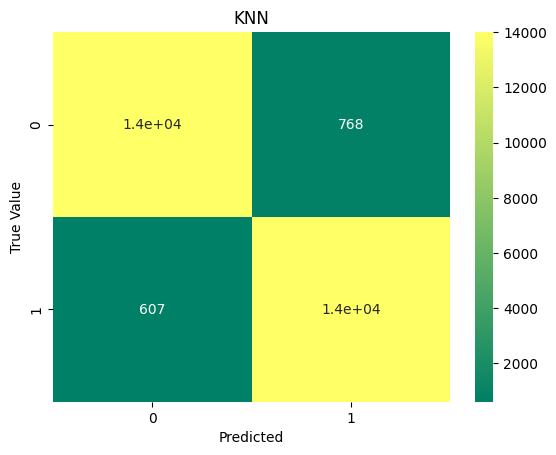

In [100]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
confusion_matrices_knn.append(cm)
sns.heatmap(cm,annot=True,fmt='.3g',cmap='summer')
plt.ylabel("True Value")
plt.xlabel("Predicted")
plt.title("KNN")
plt.show()

In [101]:
cm

array([[13980,   768],
       [  607, 14006]], dtype=int64)

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob = knn.predict_proba(x_test)[:,1]
y_prob

array([0., 1., 0., ..., 0., 0., 0.])

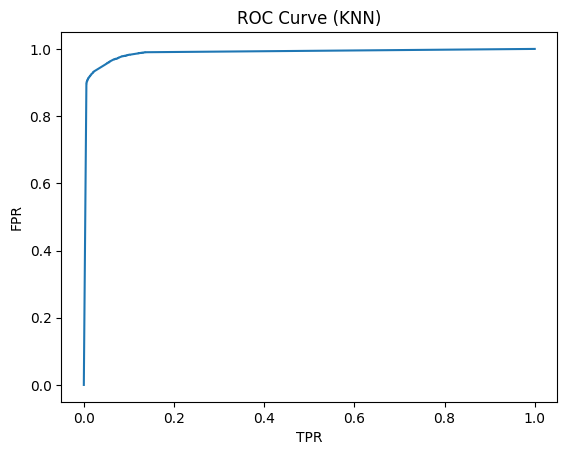

In [103]:
tpr,fpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(tpr,fpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve (KNN)')
plt.show()


In [104]:
roc_auc_knn = roc_auc_score(y_test, y_prob)
roc_auc_scores_knn.append(roc_auc_knn)
print(f"ROC AUC Score: {roc_auc_knn}")

ROC AUC Score: 0.9878497803682167


In [105]:
fpr

array([0.        , 0.89509341, 0.89598303, 0.89598303, 0.89653049,
       0.89653049, 0.89659892, 0.89659892, 0.89666735, 0.89666735,
       0.89680422, 0.89680422, 0.89906248, 0.89906248, 0.8995415 ,
       0.8995415 , 0.90036269, 0.90036269, 0.90104701, 0.90104701,
       0.90118388, 0.90118388, 0.90138917, 0.90138917, 0.90214193,
       0.90214193, 0.90227879, 0.90227879, 0.90262095, 0.90262095,
       0.90282625, 0.90282625, 0.90289468, 0.90289468, 0.90316841,
       0.90316841, 0.90344214, 0.90344214, 0.90412646, 0.90412646,
       0.90433176, 0.90433176, 0.90446862, 0.90446862, 0.90460549,
       0.90460549, 0.90467392, 0.90467392, 0.90481078, 0.90481078,
       0.90515295, 0.90515295, 0.90556354, 0.90556354, 0.90556354,
       0.90645316, 0.90645316, 0.90713748, 0.90713748, 0.9078218 ,
       0.9078218 , 0.90809553, 0.90809553, 0.90830083, 0.90830083,
       0.90843769, 0.90843769, 0.90850612, 0.90850612, 0.90877985,
       0.90877985, 0.90884829, 0.90884829, 0.90912201, 0.90912

In [106]:
tpr

array([0.        , 0.00556008, 0.00556008, 0.00562788, 0.00562788,
       0.00569569, 0.00569569, 0.0058313 , 0.0058313 , 0.0058991 ,
       0.0058991 , 0.00596691, 0.00596691, 0.00603472, 0.00603472,
       0.00610252, 0.00610252, 0.00617033, 0.00617033, 0.00630594,
       0.00630594, 0.00637375, 0.00637375, 0.00644155, 0.00644155,
       0.00650936, 0.00650936, 0.00657716, 0.00657716, 0.00671277,
       0.00671277, 0.00678058, 0.00678058, 0.006984  , 0.006984  ,
       0.0070518 , 0.0070518 , 0.00711961, 0.00711961, 0.00718742,
       0.00718742, 0.00725522, 0.00725522, 0.00732303, 0.00732303,
       0.00739083, 0.00739083, 0.00745864, 0.00745864, 0.00752644,
       0.00752644, 0.00759425, 0.00759425, 0.00772986, 0.00779767,
       0.00779767, 0.00786547, 0.00786547, 0.00793328, 0.00793328,
       0.00806889, 0.00806889, 0.0081367 , 0.0081367 , 0.0082045 ,
       0.0082045 , 0.00827231, 0.00827231, 0.00847573, 0.00847573,
       0.00854353, 0.00854353, 0.00861134, 0.00861134, 0.00867

In [107]:
out = knn.predict_proba(x_test)[:,1]
threshold =  0.1612422
y_predlst=[]
# zero_list=[]
for i in out:
    if i>threshold:
        y_predlst.append(1)
    else:
        y_predlst.append(0)

In [108]:
y_pred_array=pd.Series(y_predlst)
y_pred_array

0        0
1        1
2        0
3        1
4        0
        ..
29356    0
29357    1
29358    0
29359    0
29360    0
Length: 29361, dtype: int64

In [109]:
accuracy_knn = accuracy_score(y_test, y_pred_array)
accuracy_scores_knn.append(accuracy_knn)
print(f"Accuracy Score: {accuracy_knn}")

Accuracy Score: 0.9414188890024182


In [110]:
results = {
    'KNN_Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'KNN_Score': [kfold_crossvalidation_score_knn, train_score_knn, test_score_knn, accuracy_knn, roc_auc_knn]
}

results_df_knn = pd.DataFrame(results)
results_df_knn

KNN_Metric  KNN_Score
0  K-Fold Cross Validation Score   0.952146
1                    Train Score   0.972786
2                     Test Score   0.953169
3                 Accuracy Score   0.941419
4                  ROC AUC Score   0.987850

### DECISION TREE

In [112]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [113]:
dt = DecisionTreeClassifier()
# gcv = GridSearchCV(dt,params,cv=5)
rcv = RandomizedSearchCV(dt,params,cv=5)

In [114]:
# gcv.fit(x_train,y_train)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [115]:
# gcv.best_params_
rcv.best_params_

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini'}

In [116]:
# gcv.best_score_
rcv.best_score_

0.955526612955708

In [117]:
fold_scores_dt = []
confusion_matrices_dt = []
roc_auc_scores_dt = []
accuracy_scores_dt = []

In [118]:
from statistics import mean
n=0
scores_dt=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    dt = DecisionTreeClassifier(
    splitter='best',
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    max_depth=30,
    criterion='entropy'
)
    dt.fit(x_trainkfold,y_trainkfold)
    score = dt.score(x_testkfold,y_testkfold)
    scores_dt.append(score)
    fold_scores_dt.append(score)
    print(f"Fold {n} (DT) : {score}")
print(scores_dt)
kfold_crossvalidation_score_dt=mean(scores_dt)
kfold_crossvalidation_score_dt
    
    
    

Fold 1 (DT) : 0.9532121418536336
Fold 2 (DT) : 0.9557220708446866
Fold 3 (DT) : 0.9543170980926431
Fold 4 (DT) : 0.9557646457765667
Fold 5 (DT) : 0.9553388964577657
[0.9532121418536336, 0.9557220708446866, 0.9543170980926431, 0.9557646457765667, 0.9553388964577657]


0.9548709706050591

In [119]:
train_score_dt = dt.score(x_train, y_train)
test_score_dt = dt.score(x_test, y_test)
print(f"Train Score: {train_score_dt}")
print(f"Test Score: {test_score_dt}")

Train Score: 0.9684096695361927
Test Score: 0.955553284969858


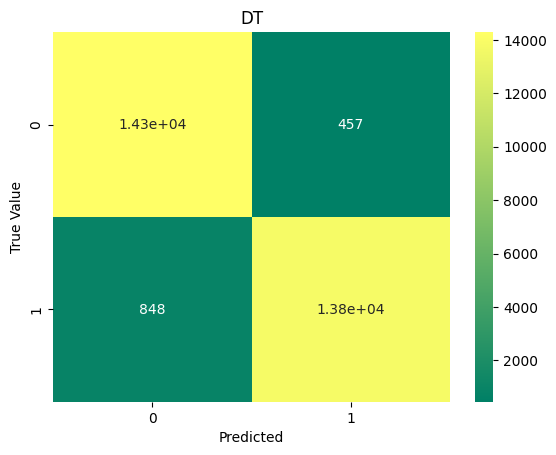

In [120]:
y_pred = dt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
confusion_matrices_dt.append(cm)
sns.heatmap(cm,annot=True,fmt='.3g',cmap='summer')
plt.ylabel("True Value")
plt.xlabel("Predicted")
plt.title("DT")
plt.show()

In [121]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob = dt.predict_proba(x_test)[:,1]
y_prob

array([0., 1., 0., ..., 0., 0., 0.])

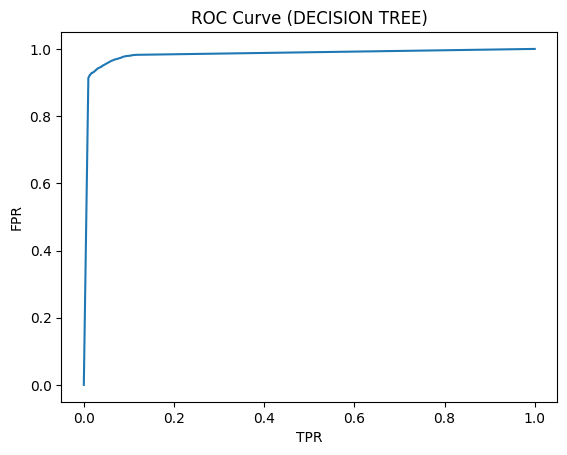

In [122]:
tpr,fpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(tpr,fpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve (DECISION TREE)')
plt.show()


In [123]:
roc_auc_dt = roc_auc_score(y_test, y_prob)
roc_auc_scores_dt.append(roc_auc_dt)
print(f"ROC AUC Score: {roc_auc_dt}")

ROC AUC Score: 0.9825490721829233


In [124]:
tpr

array([0.        , 0.01003526, 0.01003526, 0.01003526, 0.01010306,
       0.01064551, 0.01132357, 0.01139138, 0.01152699, 0.01261188,
       0.01267969, 0.0128831 , 0.01410361, 0.01451044, 0.01471386,
       0.01654462, 0.01661242, 0.01701926, 0.01715487, 0.01715487,
       0.02156225, 0.02190127, 0.02413887, 0.02502034, 0.02610523,
       0.02637646, 0.02637646, 0.02868186, 0.0292243 , 0.03044481,
       0.03058042, 0.03085164, 0.03098725, 0.03946298, 0.04007323,
       0.04014104, 0.04142935, 0.04244643, 0.06156767, 0.06448332,
       0.06570382, 0.06624627, 0.06787361, 0.0700434 , 0.07017901,
       0.07065365, 0.07153512, 0.07262002, 0.07851912, 0.07872254,
       0.07933279, 0.08068891, 0.08184161, 0.08197722, 0.08658801,
       0.08692704, 0.08957147, 0.09004611, 0.09425007, 0.09452129,
       0.09499593, 0.09655547, 0.09838622, 0.09953892, 0.09981014,
       0.1028614 , 0.10686195, 0.10733659, 0.11038785, 0.11045566,
       0.11133713, 0.11235422, 0.11269325, 0.11357472, 0.11377

In [125]:
fpr

array([0.        , 0.91247519, 0.91322795, 0.91370697, 0.91411757,
       0.91534935, 0.9163074 , 0.91664956, 0.91747075, 0.92061863,
       0.92082392, 0.92185041, 0.92287689, 0.92383494, 0.92465613,
       0.92664066, 0.92698282, 0.92773558, 0.92828304, 0.92835147,
       0.93081503, 0.93108876, 0.93396291, 0.93485253, 0.93594744,
       0.9364949 , 0.93697393, 0.93923219, 0.94005338, 0.94176418,
       0.94176418, 0.94190105, 0.94196948, 0.94744406, 0.94778622,
       0.94833368, 0.94983918, 0.95059194, 0.96482584, 0.96605762,
       0.96667351, 0.96722097, 0.96824745, 0.96906864, 0.9692055 ,
       0.96934237, 0.96954766, 0.9696161 , 0.97228495, 0.97235338,
       0.97262711, 0.97303771, 0.9734483 , 0.97358516, 0.97632245,
       0.97645932, 0.9774858 , 0.97755423, 0.97871758, 0.97871758,
       0.97878601, 0.97899131, 0.9794019 , 0.97953877, 0.97953877,
       0.97974406, 0.98124957, 0.98124957, 0.98179703, 0.98179703,
       0.98186546, 0.98193389, 0.98200233, 0.98207076, 0.98207

In [126]:
out = dt.predict_proba(x_test)[:,1]
threshold = 0.09567399
y_predlst=[]
# zero_list=[]
for i in out:
    if i>threshold:
        y_predlst.append(1)
    else:
        y_predlst.append(0)

In [127]:
y_pred_array=pd.Series(y_predlst)
y_pred_array

0        0
1        1
2        0
3        1
4        0
        ..
29356    0
29357    1
29358    0
29359    0
29360    0
Length: 29361, dtype: int64

In [128]:
accuracy_dt = accuracy_score(y_test, y_pred_array)
accuracy_scores_knn.append(accuracy_dt)
print(f"Accuracy Score: {accuracy_dt}")

Accuracy Score: 0.9354586015462688


In [129]:
results = {
    'Decision_Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Decision_Score': [kfold_crossvalidation_score_dt, train_score_dt, test_score_dt, accuracy_dt, roc_auc_dt]
}

results_df_dt = pd.DataFrame(results)
results_df_dt

Decision_Metric  Decision_Score
0  K-Fold Cross Validation Score        0.954871
1                    Train Score        0.968410
2                     Test Score        0.955553
3                 Accuracy Score        0.935459
4                  ROC AUC Score        0.982549

### RANDOM FOREST

In [130]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
# gcv = GridSearchCV(rf,params,cv=5)
rcv = RandomizedSearchCV(rf,params,cv=5)
rcv.fit(x_train,y_train)
# gcv.fit(x_train,y_train)
# gcv.best_params_
rcv.best_params_


{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [131]:
# gcv.best_score_
rcv.best_score_

0.9589410953042778

In [132]:
fold_scores_rf = []
confusion_matrices_rf = []
roc_auc_scores_rf = []
accuracy_scores_rf = []

In [133]:
from statistics import mean
n=0
scores_rf=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=40,
    criterion='entropy',
    bootstrap=True
)
    rf.fit(x_trainkfold,y_trainkfold)
    score = rf.score(x_testkfold,y_testkfold)
    scores_rf.append(score)
    fold_scores_rf.append(score)
    print(f"Fold {n} (rf) : {score}")
print(scores_rf)
kfold_crossvalidation_score_rf=mean(scores_rf)
kfold_crossvalidation_score_rf
    
    
    

Fold 1 (rf) : 0.9575971731448764
Fold 2 (rf) : 0.9591706403269755
Fold 3 (rf) : 0.9578933923705722
Fold 4 (rf) : 0.959766689373297
Fold 5 (rf) : 0.9585320163487738
[0.9575971731448764, 0.9591706403269755, 0.9578933923705722, 0.959766689373297, 0.9585320163487738]


0.958591982312899

In [134]:
train_score_rf = rf.score(x_train, y_train)
test_score_rf = rf.score(x_test, y_test)
print(f"Train Score: {train_score_rf}")
print(f"Test Score: {test_score_rf}")

Train Score: 0.9697890855833993
Test Score: 0.9600149858656041


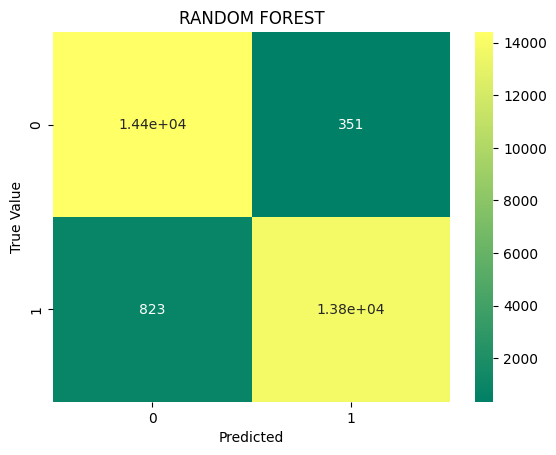

In [135]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
confusion_matrices_rf.append(cm)
sns.heatmap(cm,annot=True,fmt='.3g',cmap='summer')
plt.ylabel("True Value")
plt.xlabel("Predicted")
plt.title("RANDOM FOREST")
plt.show()

In [136]:
from sklearn.metrics import roc_curve,roc_auc_score
y_prob = rf.predict_proba(x_test)[:,1]
y_prob

array([7.19461816e-04, 1.00000000e+00, 7.80458085e-02, ...,
       6.71426420e-05, 1.42441242e-03, 7.35547296e-03])

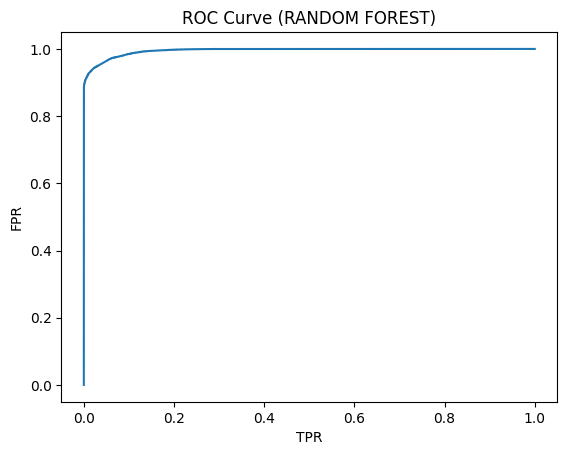

In [137]:
tpr,fpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(tpr,fpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve (RANDOM FOREST)')
plt.show()


In [138]:
roc_auc_rf = roc_auc_score(y_test, y_prob)
roc_auc_scores_rf.append(roc_auc_rf)
print(f"ROC AUC Score: {roc_auc_rf}")

ROC AUC Score: 0.995048979148887


In [139]:
tpr

array([0.        , 0.        , 0.        , ..., 0.976607  , 0.97742067,
       1.        ])

In [140]:
fpr

array([0.        , 0.62882365, 0.67350989, ..., 1.        , 1.        ,
       1.        ])

In [141]:
out = dt.predict_proba(x_test)[:,1]
threshold = 2.35828587e-01
y_predlst=[]
# zero_list=[]
for i in out:
    if i>threshold:
        y_predlst.append(1)
    else:
        y_predlst.append(0)

In [142]:
y_pred_array=pd.Series(y_predlst)
y_pred_array

0        0
1        1
2        0
3        1
4        0
        ..
29356    0
29357    1
29358    0
29359    0
29360    0
Length: 29361, dtype: int64

In [143]:
accuracy_rf = accuracy_score(y_test, y_pred_array)
accuracy_scores_rf.append(accuracy_rf)
print(f"Accuracy Score: {accuracy_rf}")

Accuracy Score: 0.9447225911923981


In [144]:
results = {
    'RF_Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'RF_Score': [kfold_crossvalidation_score_rf, train_score_rf, test_score_rf, accuracy_rf, roc_auc_rf]
}

results_df_rf = pd.DataFrame(results)
results_df_rf

RF_Metric  RF_Score
0  K-Fold Cross Validation Score  0.958592
1                    Train Score  0.969789
2                     Test Score  0.960015
3                 Accuracy Score  0.944723
4                  ROC AUC Score  0.995049

### LOGISTIC REGRESSION

In [145]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    # 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Only used if penalty='elasticnet'
}
lg = LogisticRegression()
# gcv = GridSearchCV(lg,params,cv=5)
# gcv.fit(x_train,y_train)
# gcv.best_params_
rcv = RandomizedSearchCV(lg,params,cv=5)
rcv.fit(x_train,y_train)
# gcv.fit(x_train,y_train)
# gcv.best_params_
rcv.best_params_


{'solver': 'saga', 'penalty': 'l1', 'max_iter': 300, 'C': 0.01}

In [146]:
# gcv.best_score_
rcv.best_score_

0.9253242140242351

In [147]:
fold_scores_lg = []
confusion_matrices_lg = []
roc_auc_scores_lg = []
accuracy_scores_lg = []

In [148]:
from statistics import mean
n=0
scores_lg=[]
for train,test in kfold.split(x_train):
    n+=1
    x_trainkfold=x_train.iloc[train]
    y_trainkfold = y_train.iloc[train]
    x_testkfold = x_train.iloc[test]
    y_testkfold = y_train.iloc[test]
    lg = LogisticRegression(
    solver='saga',
    penalty='l1',
    max_iter=200,
    C=0.01
    )
    lg.fit(x_trainkfold,y_trainkfold)
    score = lg.score(x_testkfold,y_testkfold)
    scores_lg.append(score)
    fold_scores_lg.append(score)
    print(f"Fold {n} (LG) : {score}")
print(scores_lg)
kfold_crossvalidation_score_lg=mean(scores_lg)
kfold_crossvalidation_score_lg
    
    
    

Fold 1 (LG) : 0.9240921282302355
Fold 2 (LG) : 0.9266859673024523
Fold 3 (LG) : 0.925366144414169
Fold 4 (LG) : 0.9248552452316077
Fold 5 (LG) : 0.9251958446866485
[0.9240921282302355, 0.9266859673024523, 0.925366144414169, 0.9248552452316077, 0.9251958446866485]


0.9252390659730226

In [149]:
train_score_lg = lg.score(x_train, y_train)
test_score_lg = lg.score(x_test, y_test)
print(f"Train Score: {train_score_lg}")
print(f"Test Score: {test_score_lg}")

Train Score: 0.9252049965514599
Test Score: 0.9239467320595347


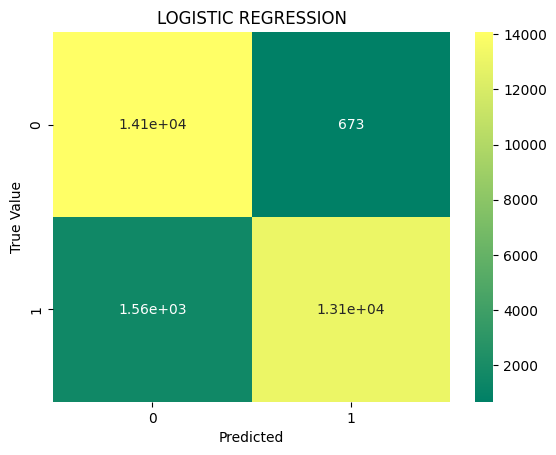

In [150]:
y_pred = lg.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
confusion_matrices_lg.append(cm)
sns.heatmap(cm,annot=True,fmt='.3g',cmap='summer')
plt.ylabel("True Value")
plt.xlabel("Predicted")
plt.title("LOGISTIC REGRESSION")
plt.show()

In [151]:
y_prob = lg.predict_proba(x_test)[:,1]
y_prob

array([0.38854138, 0.9998489 , 0.01047427, ..., 0.03518086, 0.00114868,
       0.35864163])

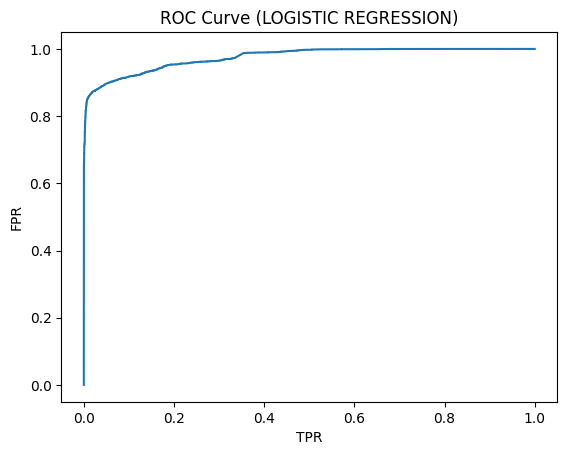

In [152]:
tpr,fpr,thresholds = roc_curve(y_test,y_prob)
plt.plot(tpr,fpr)

plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve (LOGISTIC REGRESSION)')
plt.show()


In [153]:
roc_auc_lg = roc_auc_score(y_test, y_prob)
roc_auc_scores_lg.append(roc_auc_lg)
print(f"ROC AUC Score: {roc_auc_lg}")

ROC AUC Score: 0.975295013481444


In [154]:
fpr

array([0.00000000e+00, 2.05296654e-04, 7.52754397e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [155]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99925414, 0.99952536,
       1.        ])

In [156]:
out = lg.predict_proba(x_test)[:,1]
threshold = 0.99952536
y_predlst=[]
# zero_list=[]
for i in out:
    if i>threshold:
        y_predlst.append(1)
    else:
        y_predlst.append(0)

In [157]:
y_pred_array=pd.Series(y_predlst)
y_pred_array

0        0
1        1
2        0
3        0
4        0
        ..
29356    0
29357    0
29358    0
29359    0
29360    0
Length: 29361, dtype: int64

In [158]:
accuracy_lg = accuracy_score(y_test, y_pred_array)
accuracy_scores_lg.append(accuracy_lg)
print(f"Accuracy Score: {accuracy_lg}")

Accuracy Score: 0.6086986138074316


In [159]:
results = {
    'Logistic_Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Logistic_Score': [kfold_crossvalidation_score_lg, train_score_lg, test_score_lg, accuracy_lg, roc_auc_lg]
}

results_df_lg = pd.DataFrame(results)
results_df_lg

Logistic_Metric  Logistic_Score
0  K-Fold Cross Validation Score        0.925239
1                    Train Score        0.925205
2                     Test Score        0.923947
3                 Accuracy Score        0.608699
4                  ROC AUC Score        0.975295

### ADABOOST

In [160]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean
import pandas as pd
params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
    'algorithm': ['SAMME', 'SAMME.R']
}
adaboost = AdaBoostClassifier()
# gcv = GridSearchCV(adaboost,params,cv=5)
# gcv.fit(x_train,y_train)
# gcv.best_params_
rcv = RandomizedSearchCV(adaboost,params,cv=5)
rcv.fit(x_train,y_train)
# gcv.fit(x_train,y_train)
# gcv.best_params_
rcv.best_params_
fold_scores_adaboost = []
confusion_matrices_adaboost = []
roc_auc_scores_adaboost = []
accuracy_scores_adaboost = []

In [161]:
rcv.best_params_

{'n_estimators': 150, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

In [162]:
# gcv.best_score_
rcv.best_score_

0.956914546672261

In [163]:
n = 0
scores_adaboost = []

for train, test in kfold.split(x_train):
    n += 1
    x_train_kfold = x_train.iloc[train]
    y_train_kfold = y_train.iloc[train]
    x_test_kfold = x_train.iloc[test]
    y_test_kfold = y_train.iloc[test]
    
    adaboost = AdaBoostClassifier(n_estimators= 150, learning_rate= 1, algorithm= 'SAMME.R')
    adaboost.fit(x_train_kfold, y_train_kfold)
    
    score = adaboost.score(x_test_kfold, y_test_kfold)
    scores_adaboost.append(score)
    fold_scores_adaboost.append(score)
    print(f"Fold {n} (Adaboost): {score}")

print(scores_adaboost)
kfold_crossvalidation_score_adaboost = mean(scores_adaboost)
print(f"K-Fold Cross Validation Score (Adaboost): {kfold_crossvalidation_score_adaboost}")


Fold 1 (Adaboost): 0.9555536634169186
Fold 2 (Adaboost): 0.9576379427792916
Fold 3 (Adaboost): 0.9565735694822888
Fold 4 (Adaboost): 0.9575953678474114
Fold 5 (Adaboost): 0.9567864441416893
[0.9555536634169186, 0.9576379427792916, 0.9565735694822888, 0.9575953678474114, 0.9567864441416893]
K-Fold Cross Validation Score (Adaboost): 0.9568293975335199


In [164]:
train_score_adaboost = adaboost.score(x_train, y_train)
test_score_adaboost = adaboost.score(x_test, y_test)
print(f"Train Score (Adaboost): {train_score_adaboost}")
print(f"Test Score (Adaboost): {test_score_adaboost}")

Train Score (Adaboost): 0.9566250287378343
Test Score (Adaboost): 0.9580055175232451


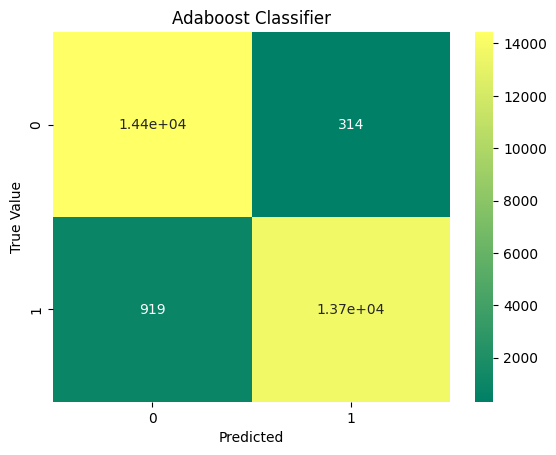

In [165]:
y_pred_adaboost = adaboost.predict(x_test)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
confusion_matrices_adaboost.append(cm_adaboost)
sns.heatmap(cm_adaboost, annot=True, fmt='.3g', cmap='summer')
plt.ylabel("True Value")
plt.xlabel("Predicted")
plt.title("Adaboost Classifier")
plt.show()

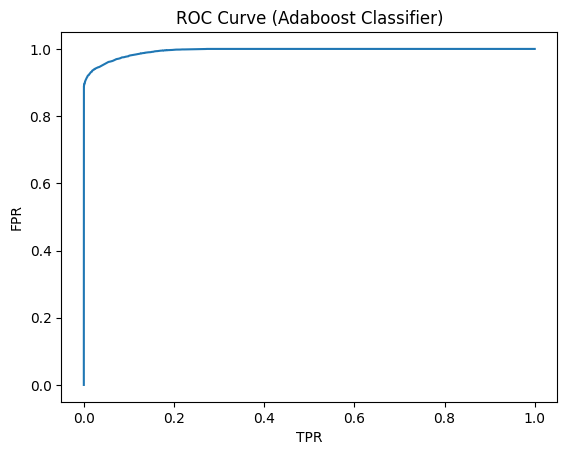

In [166]:
y_prob_adaboost = adaboost.predict_proba(x_test)[:, 1]

tpr_adaboost, fpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
plt.plot(tpr_adaboost, fpr_adaboost)
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.title('ROC Curve (Adaboost Classifier)')
plt.show()

In [167]:
roc_auc_adaboost = roc_auc_score(y_test, y_prob_adaboost)
roc_auc_scores_adaboost.append(roc_auc_adaboost)
print(f"ROC AUC Score (Adaboost): {roc_auc_adaboost}")

ROC AUC Score (Adaboost): 0.9942320103865518


In [168]:
fpr

array([0.00000000e+00, 2.05296654e-04, 7.52754397e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [169]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99925414, 0.99952536,
       1.        ])

In [170]:
out = adaboost.predict_proba(x_test)[:,1]
threshold_adaboost = 0.99952536
y_pred_lst_adaboost = []

for i in y_prob_adaboost:
    if i > threshold_adaboost:
        y_pred_lst_adaboost.append(1)
    else:
        y_pred_lst_adaboost.append(0)

In [171]:
y_pred_array_adaboost = pd.Series(y_pred_lst_adaboost)

In [172]:
accuracy_adaboost = accuracy_score(y_test, y_pred_array_adaboost)
accuracy_scores_adaboost.append(accuracy_adaboost)
print(f"Accuracy Score (Adaboost): {accuracy_adaboost}")

Accuracy Score (Adaboost): 0.5022989680188005


In [173]:
results_adaboost = {
    'Adaboost_Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Adaboost_Score': [kfold_crossvalidation_score_adaboost, train_score_adaboost, test_score_adaboost, accuracy_adaboost, roc_auc_adaboost]
}

results_df_adaboost = pd.DataFrame(results_adaboost)
results_df_adaboost

Adaboost_Metric  Adaboost_Score
0  K-Fold Cross Validation Score        0.956829
1                    Train Score        0.956625
2                     Test Score        0.958006
3                 Accuracy Score        0.502299
4                  ROC AUC Score        0.994232

In [174]:
import pandas as pd

# Data for each model
results_knn = {
    'Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'KNN': [kfold_crossvalidation_score_knn, train_score_knn, test_score_knn, accuracy_knn, roc_auc_knn]
}

results_dt = {
    'Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Decision Tree': [kfold_crossvalidation_score_dt, train_score_dt, test_score_dt, accuracy_dt, roc_auc_dt]
}

results_rf = {
    'Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Random Forest': [kfold_crossvalidation_score_rf, train_score_rf, test_score_rf, accuracy_rf, roc_auc_rf]
}

results_lg = {
    'Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Logistic Regression': [kfold_crossvalidation_score_lg, train_score_lg, test_score_lg, accuracy_lg, roc_auc_lg]
}

results_adaboost = {
    'Metric': ['K-Fold Cross Validation Score', 'Train Score', 'Test Score', 'Accuracy Score', 'ROC AUC Score'],
    'Adaboost': [kfold_crossvalidation_score_adaboost, train_score_adaboost, test_score_adaboost, accuracy_adaboost, roc_auc_adaboost]
}

# Creating DataFrames
df_knn = pd.DataFrame(results_knn)
df_dt = pd.DataFrame(results_dt)
df_rf = pd.DataFrame(results_rf)
df_lg = pd.DataFrame(results_lg)
df_adaboost = pd.DataFrame(results_adaboost)

# Merge all the results DataFrames on the 'Metric' column
joined_results_df = df_knn.merge(df_dt, on="Metric")
joined_results_df = joined_results_df.merge(df_rf, on="Metric")
joined_results_df = joined_results_df.merge(df_lg, on="Metric")
joined_results_df = joined_results_df.merge(df_adaboost, on="Metric")

joined_results_df


Metric       KNN  Decision Tree  Random Forest  \
0  K-Fold Cross Validation Score  0.952146       0.954871       0.958592   
1                    Train Score  0.972786       0.968410       0.969789   
2                     Test Score  0.953169       0.955553       0.960015   
3                 Accuracy Score  0.941419       0.935459       0.944723   
4                  ROC AUC Score  0.987850       0.982549       0.995049   

   Logistic Regression  Adaboost  
0             0.925239  0.956829  
1             0.925205  0.956625  
2             0.923947  0.958006  
3             0.608699  0.502299  
4             0.975295  0.994232

Final Report

Best Model: Random Forest

The Random Forest model consistently outperforms or matches the performance of other models across all key metrics:

It achieves the highest K-Fold Cross Validation Score of 95.86%, demonstrating excellent generalization ability.
The Train Score of 96.98% and Test Score of 96.00% are among the highest, reflecting strong learning and effective performance on unseen data.

The Accuracy Score of 94.47% ensures reliable and correct predictions.

With a ROC AUC Score of 99.50%, Random Forest showcases exceptional classification ability, especially in distinguishing between different classes, making it ideal for datasets with imbalanced classes.

Conclusion:

Given its strong performance across all metrics, Random Forest is the best model for this task, offering a balanced trade-off between accuracy, generalization, and class distinction.